In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score
from collections import Counter
from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.preprocessing import normalize
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency
from sklearn.model_selection import KFold
import warnings



plt.rcParams['figure.figsize'] = [11,8]

# Part1 Project Description 
<h4><b>DOMAIN:</b></h4> Healthcare
<h4><b>• CONTEXT:</b></h4> Medical research university X is undergoing a deep research on patients with certain conditions.
University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by
the client by providing different datasets to the AI team for developing a AIML model which can predict the
condition of the patient depending on the received test results.

<h4><b>• DATA DESCRIPTION:</b></h4> The data consists of biomechanics features of the patients according to their current
conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and
orientation of the condition to their body part.

1. P_incidence
2. P_tilt
3. L_angle
4. S_slope
5. P_radius
6. S_degree
7. Class

In [2]:
#importing Normal Dataset
normal = pd.read_csv('Part1 - Normal.csv')
typeh = pd.read_csv('Part1 - Type_H.csv')
types = pd.read_csv('Part1 - Type_S.csv')

In [3]:
normal.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [4]:
typeh.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [5]:
types.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


## Understanding Normal dataset


In [6]:
# dataset Descriptions
print("Checking for null Values :")
normal.isnull().sum()

Checking for null Values :


P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [7]:
# features datatypes
normal.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

<b>Note : </b>Clearly we can see that there no null values and all are float types except Target variable

In [8]:
#shape of the dataset
normal.shape

(100, 7)

In [9]:
# Statistics of dataset
normal.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,100.0,51.685244,12.368161,30.741938,42.817849,50.123115,61.470097,89.834676
P_tilt,100.0,12.821414,6.778503,-5.845994,8.799951,13.482435,16.785953,29.894119
L_angle,100.0,43.542605,12.361388,19.071075,35.000000,42.638923,51.602346,90.563461
S_slope,100.0,38.863830,9.624004,17.386972,32.340487,37.059694,44.608788,67.195460
P_radius,100.0,123.890834,9.014246,100.501192,118.182659,123.874328,129.040401,147.894637
S_Degree,100.0,2.186572,6.307483,-11.058179,-1.511360,1.152710,4.968807,31.172767


In [10]:
# different class 
normal.Class.value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

## Understanding H dataset

In [11]:
# dataset Descriptions
print("Checking for null Values :")
typeh.isnull().sum()

Checking for null Values :


P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [12]:
# features datatypes
typeh.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [13]:
#shape of the dataset
typeh.shape

(60, 7)

In [14]:
# Statistics of dataset
typeh.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,60.0,47.638407,10.697131,26.147921,41.018099,46.416169,53.922329,74.433593
P_tilt,60.0,17.398795,7.016708,3.144669,12.874329,16.949285,22.002980,41.557331
L_angle,60.0,35.463524,9.767795,14.000000,29.038069,35.164873,42.011563,62.275275
S_slope,60.0,30.239612,7.555388,13.366931,25.215275,30.000659,34.962103,46.613539
P_radius,60.0,116.474968,9.355720,84.241415,112.280320,116.696146,122.042999,137.540613
S_Degree,60.0,2.480251,5.531177,-10.675871,-0.910819,2.542441,6.059666,15.779697


In [15]:
# different class 
typeh.Class.value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

## Understanding S dataset

In [16]:
# dataset Descriptions
print("Checking for null Values :")
types.isnull().sum()

Checking for null Values :


P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [17]:
# features datatypes
types.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [18]:
#shape of the dataset
types.shape

(150, 7)

In [19]:
# Statistics of dataset
types.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,150.0,71.514224,15.109337,37.903910,60.658136,72.149306,81.075893,129.834041
P_tilt,150.0,20.748038,11.506169,-6.554948,13.461149,19.309548,29.229680,49.431864
L_angle,150.0,64.110108,16.397068,24.710274,52.000000,62.555200,76.990924,125.742385
S_slope,150.0,50.766186,12.318813,19.290046,43.166815,50.751695,56.675435,121.429566
P_radius,150.0,114.518810,15.579995,70.082575,104.706761,114.842400,123.337307,163.071041
S_Degree,150.0,51.896687,40.108030,1.010041,30.393271,42.372509,61.894425,418.543082


In [20]:
# different class 
types.Class.value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

# Cleaning 

As we can there are different format to represent the target so we will So we clean them and merge all the dataset into one dataset

In [21]:
# coverting everything N ,H,S 
normal.loc[:,'Class'] ='N'
typeh.loc[:,'Class'] ='H'
types.loc[:,'Class'] ='S'

In [22]:
#merginging the datasets into one dataset
data = pd.concat([normal,typeh,types])
data

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,N
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,N
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,N
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,N
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,N
...,...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,S
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,S
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,S
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,S


In [23]:
# shuffling the rows for better modeling 

data = shuffle(data).reset_index(drop = True)
data

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.565015,15.724320,58.618582,58.840695,105.417304,0.599247,N
1,69.781006,13.777465,58.000000,56.003541,118.930666,17.914560,S
2,46.855781,15.351514,38.000000,31.504267,116.250917,1.662706,H
3,74.005541,21.122402,57.379502,52.883139,120.205963,74.555166,S
4,63.959522,16.060945,63.123736,47.898577,142.360125,6.298971,N
...,...,...,...,...,...,...,...
305,55.843286,28.847448,47.690543,26.995838,123.311845,2.812427,H
306,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,S
307,43.203185,19.663146,35.000000,23.540039,124.846109,-2.919076,H
308,74.717228,14.321679,32.500000,60.395549,107.182218,37.017080,S


In [24]:
data['Class']=data['Class'].astype('category') #changing to category datatype

In [25]:
# uderstanding our merged dataset
print('shape = ',data.shape)
print('-'*50)
print ('Datatypes : \n',data.dtypes)
print('-'*50)
data.describe().T

shape =  (310, 7)
--------------------------------------------------
Datatypes : 
 P_incidence     float64
P_tilt          float64
L_angle         float64
S_slope         float64
P_radius        float64
S_Degree        float64
Class          category
dtype: object
--------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


# data Visualisation

<AxesSubplot:xlabel='S_Degree'>

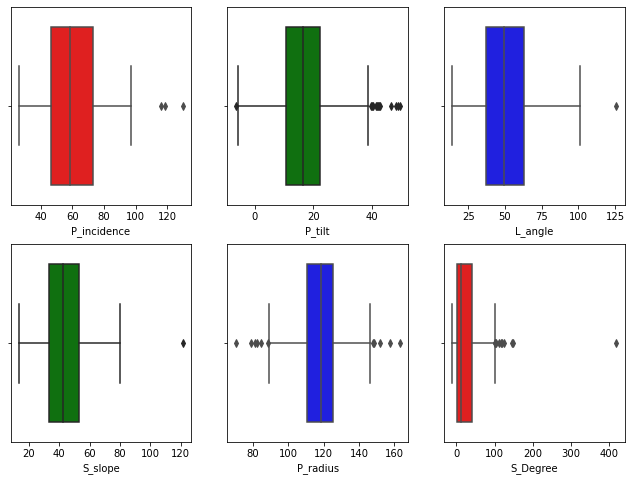

In [26]:
# lets check Any of them has outliers or normally distributed 
#plt.figure(figsize = (11,8))

plt.subplot(2,3,1)
sns.boxplot(x = 'P_incidence',data = data,color = 'red')

plt.subplot(2,3,2)
sns.boxplot(x = 'P_tilt',data = data,color = 'green')

plt.subplot(2,3,3)
sns.boxplot(x = 'L_angle',data = data,color = 'blue')

plt.subplot(2,3,4)
sns.boxplot(x = 'S_slope',data = data,color = 'green')

plt.subplot(2,3,5)
sns.boxplot(x = 'P_radius',data = data,color = 'blue')
plt.subplot(2,3,6)
sns.boxplot(x = 'S_Degree',data = data,color = 'red')

<AxesSubplot:xlabel='S_Degree', ylabel='Density'>

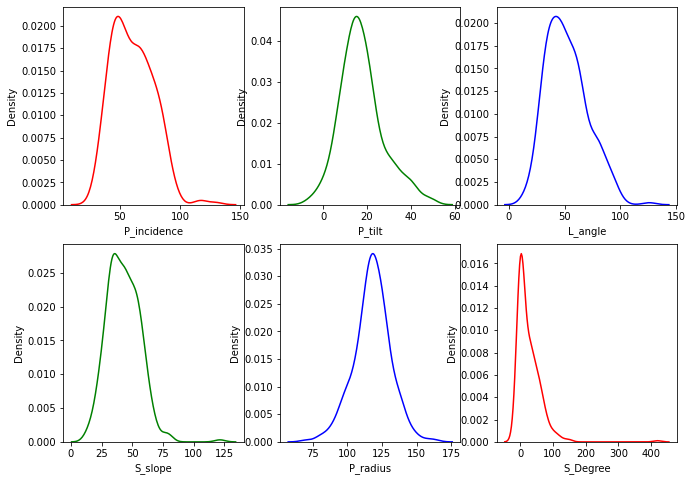

In [27]:
#distribtion of featuresdata
plt.subplot(2,3,1)
sns.kdeplot(x = 'P_incidence',data = data,color = 'red')

plt.subplot(2,3,2)
sns.kdeplot(x = 'P_tilt',data = data,color = 'green')

plt.subplot(2,3,3)
sns.kdeplot(x = 'L_angle',data = data,color = 'blue')

plt.subplot(2,3,4)
sns.kdeplot(x = 'S_slope',data = data,color = 'green')

plt.subplot(2,3,5)
sns.kdeplot(x = 'P_radius',data = data,color = 'blue')

plt.subplot(2,3,6)
sns.kdeplot(x = 'S_Degree',data = data,color = 'red')

<b>NOTE : </b> From those above boxplots and kdeplots we can see we have some outliers and neary uninormal 

In [28]:
#lets us find number of outliers
def z(x):
    m = data[col].mean()
    sd = data[col].std()
    return (x-m)/float(sd)

norm_data = pd.DataFrame()
columns =  data.columns

for col in columns[:-1]:
    norm_data[col] = data[col].apply(z)
    
norm_data['Class'] = data['Class']

In [29]:
norm_data

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,0.816195,-0.181699,0.360441,1.183546,-0.938875,-0.684188,N
1,0.538644,-0.376222,0.327102,0.972183,0.075842,-0.223172,S
2,-0.791394,-0.218948,-0.750829,-0.852975,-0.125380,-0.655874,H
3,0.783736,0.357660,0.293659,0.739718,0.171603,1.284870,S
4,0.200903,-0.148064,0.603254,0.368376,1.835156,-0.532435,N
...,...,...,...,...,...,...,...
305,-0.269971,1.129522,-0.228542,-1.188845,0.404824,-0.625263,H
306,4.022702,-0.913074,-0.191164,5.846319,-0.768183,10.443465,S
307,-1.003304,0.211856,-0.912519,-1.446297,0.520031,-0.777863,H
308,0.825026,-0.321846,-1.047260,1.299381,-0.806348,0.285428,S


In [30]:
print("Number of outliers :")
print(norm_data[norm_data.iloc[:,:-1] >2].count())
norm_data[norm_data.iloc[:,:-1] <-2].count()

Number of outliers :
P_incidence     6
P_tilt         16
L_angle        13
S_slope         6
P_radius        7
S_Degree        9
Class           0
dtype: int64


P_incidence     0
P_tilt          4
L_angle         1
S_slope         3
P_radius       11
S_Degree        0
Class           0
dtype: int64

In [31]:
# So we can see there are outliers so we need to handle them ,replacing them with median values
def handle_outlier(x):
    if x > round((norm_data[col].std())*2,2):
        return norm_data[col].median()
    if x < -round((norm_data[col].std())*2,2):
        return norm_data[col].median()
    else:
        return x

columns =  data.columns

for col in columns[:-1]:
    norm_data[col]= norm_data[col].apply(handle_outlier)

In [32]:
norm_data

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,0.816195,-0.181699,0.360441,1.183546,-0.938875,-0.684188,N
1,0.538644,-0.376222,0.327102,0.972183,0.075842,-0.223172,S
2,-0.791394,-0.218948,-0.750829,-0.852975,-0.125380,-0.655874,H
3,0.783736,0.357660,0.293659,0.739718,0.171603,1.284870,S
4,0.200903,-0.148064,0.603254,0.368376,1.835156,-0.532435,N
...,...,...,...,...,...,...,...
305,-0.269971,1.129522,-0.228542,-1.188845,0.404824,-0.625263,H
306,-0.104755,-0.913074,-0.191164,-0.040894,-0.768183,-0.386825,S
307,-1.003304,0.211856,-0.912519,-1.446297,0.520031,-0.777863,H
308,0.825026,-0.321846,-1.047260,1.299381,-0.806348,0.285428,S


In [33]:
print("Number of outliers :")
print(norm_data[norm_data.iloc[:,:-1] >2].count())
norm_data[norm_data.iloc[:,:-1] < -2].count()

Number of outliers :
P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64


P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

<AxesSubplot:xlabel='S_Degree'>

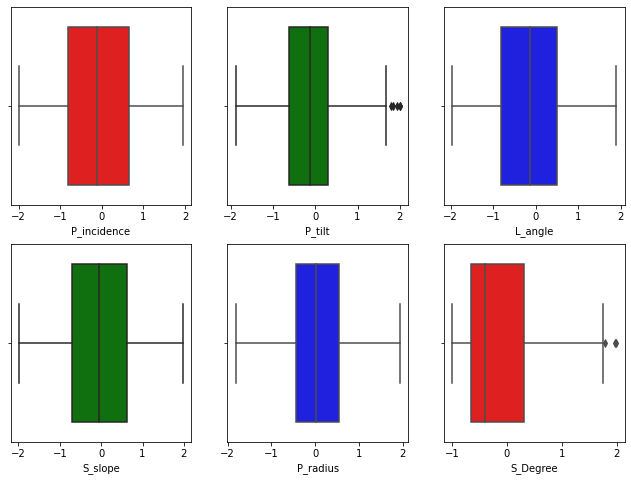

In [34]:
plt.subplot(2,3,1)
sns.boxplot(x = 'P_incidence',data = norm_data,color = 'red')

plt.subplot(2,3,2)
sns.boxplot(x = 'P_tilt',data = norm_data,color = 'green')

plt.subplot(2,3,3)
sns.boxplot(x = 'L_angle',data = norm_data,color = 'blue')

plt.subplot(2,3,4)
sns.boxplot(x = 'S_slope',data = norm_data,color = 'green')

plt.subplot(2,3,5)
sns.boxplot(x = 'P_radius',data = norm_data,color = 'blue')
plt.subplot(2,3,6)
sns.boxplot(x = 'S_Degree',data = norm_data,color = 'red')

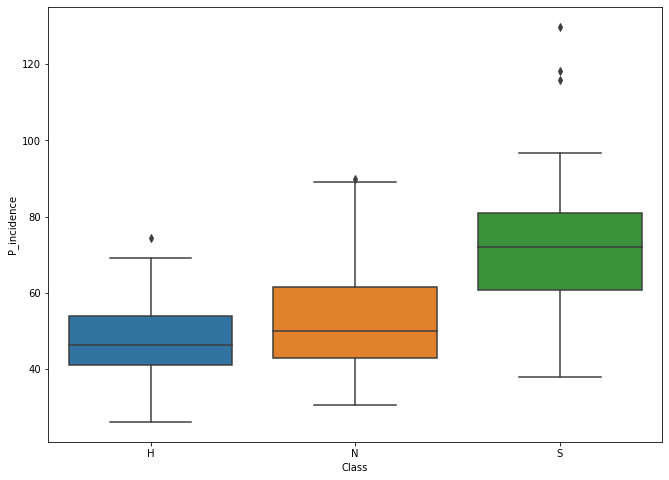

In [35]:
# how independent vairableas are connected with dependent 

sns.boxplot(x = 'Class',y = 'P_incidence',data = data)
plt.show()

<b>NOTE : </b> WE can say that if P incidence is large[>60] it belongs to S class and very less[<55] then it belongs to H class 

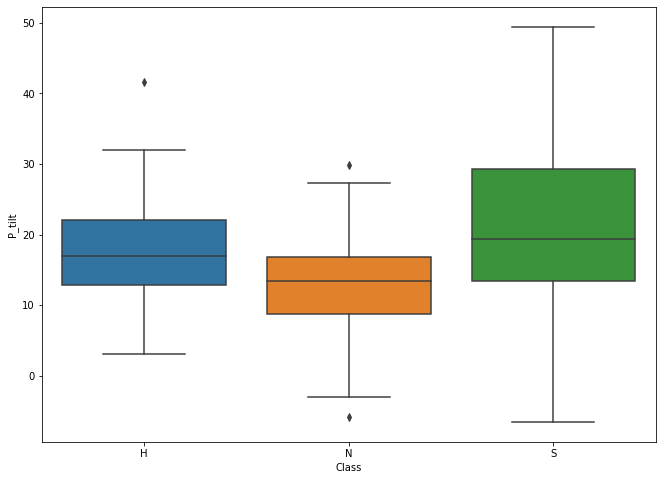

In [36]:
sns.boxplot(x = 'Class',y = 'P_tilt',data = data)
plt.show()

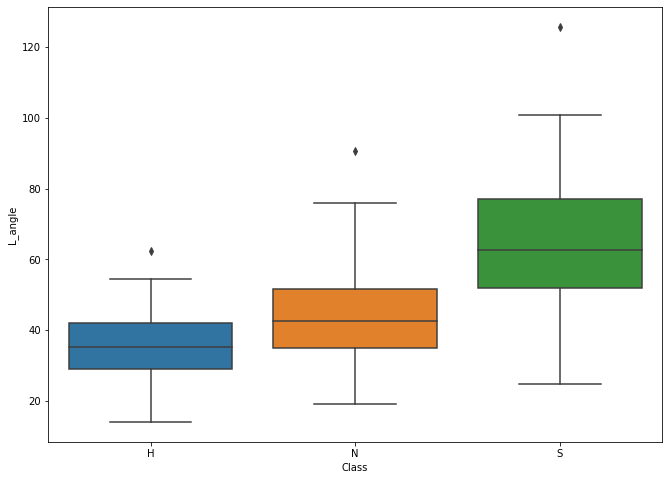

In [37]:
sns.boxplot(x = 'Class',y = 'L_angle',data = data)
plt.show()

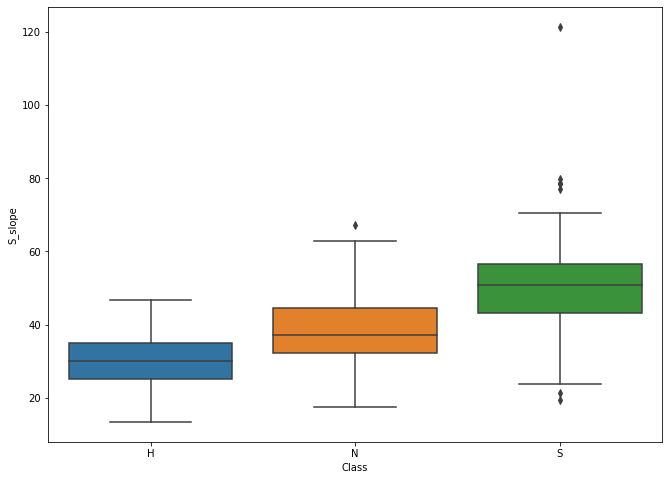

In [38]:
sns.boxplot(x = 'Class',y = 'S_slope',data = data)
plt.show()

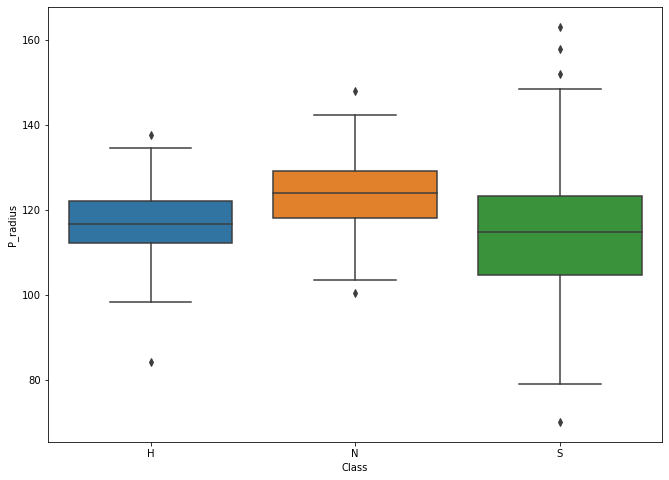

In [39]:
sns.boxplot(x = 'Class',y = 'P_radius',data = data)
plt.show()

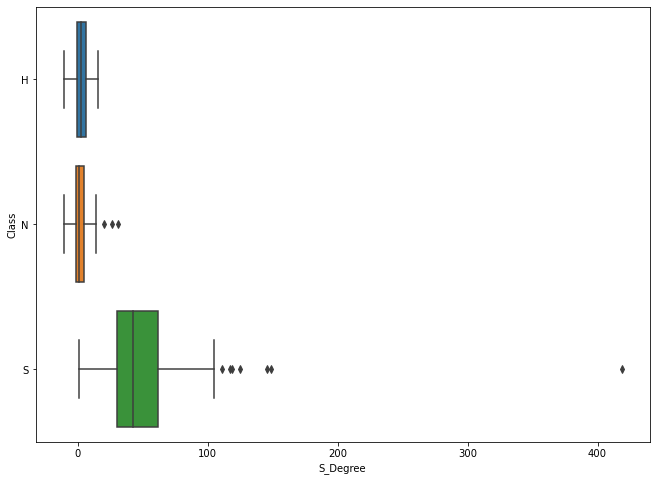

In [40]:
sns.boxplot(y = 'Class',x = 'S_Degree',data = data)
plt.show()

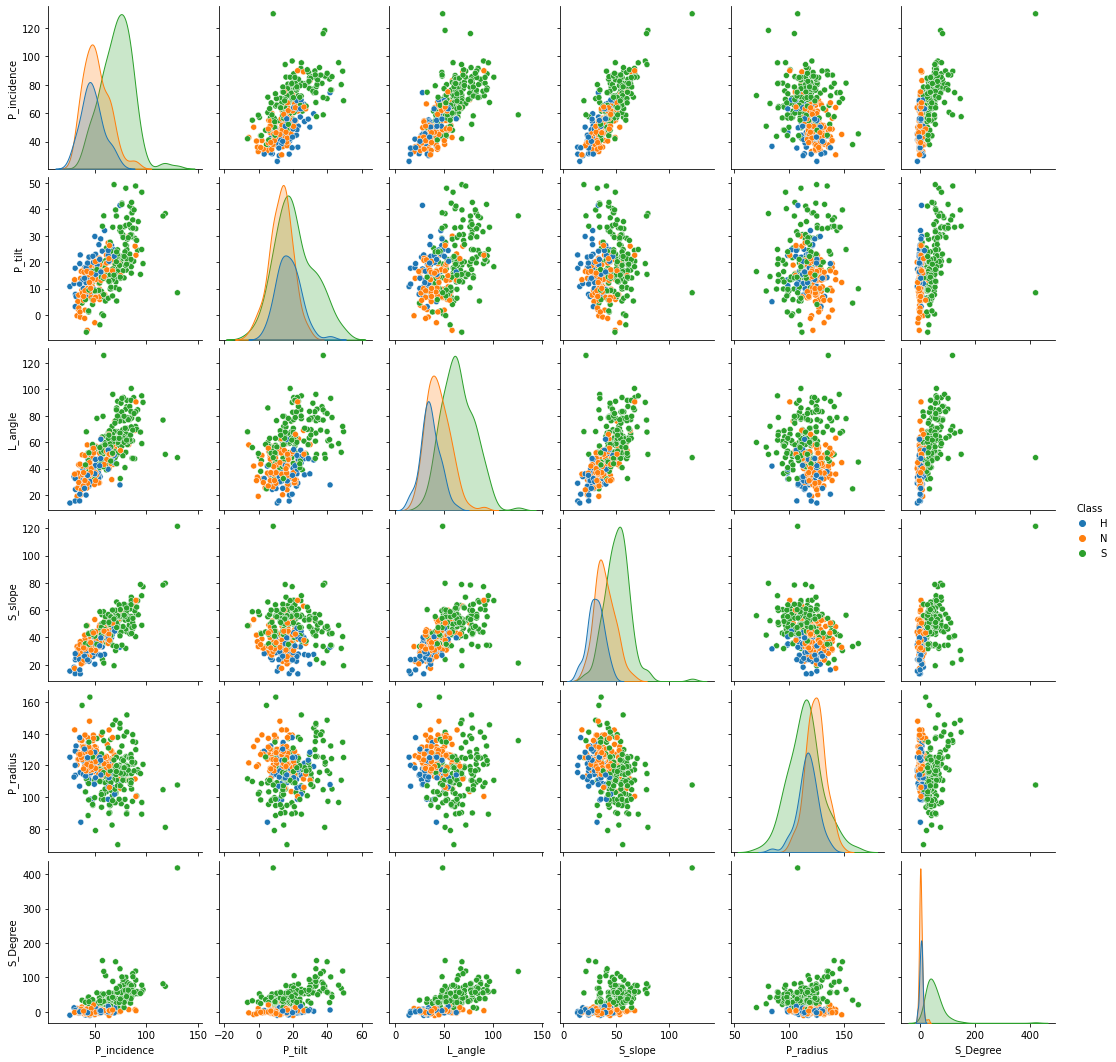

In [41]:
# lets us check for multi-colinearity 
sns.pairplot(data = data,x_vars=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree'],
    y_vars=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree'],hue = 'Class')

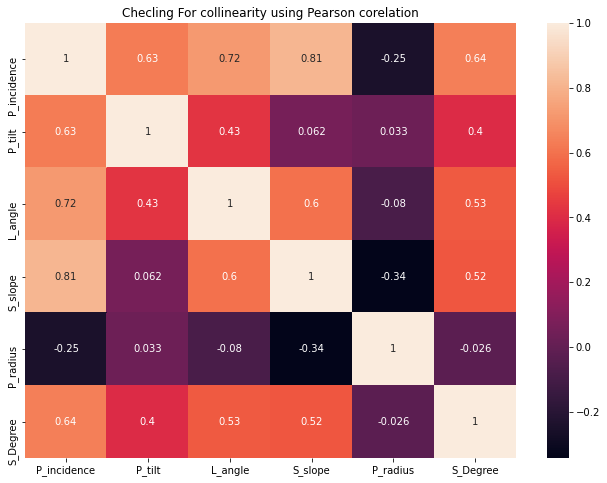

In [42]:
# heatmap
sns.heatmap(data.corr(),annot = True)
plt.title('Checling For collinearity using Pearson corelation')
plt.show()

In [43]:
corr = data.corr()
col = corr.columns
for i in range(len(corr.columns)):
    for j in range((i+1),len(corr.columns)):
        x = col[i]
        y = col[j]
        if (corr.loc[x,y] > 0.8) :
            print("(",x,",",y,") are 80% positively colinear \n")
                    
        if(corr.loc[x,y] <- 0.8):
            print("(",x,",",y,") are 80% negatively colinear \n")
       


( P_incidence , S_slope ) are 80% positively colinear 



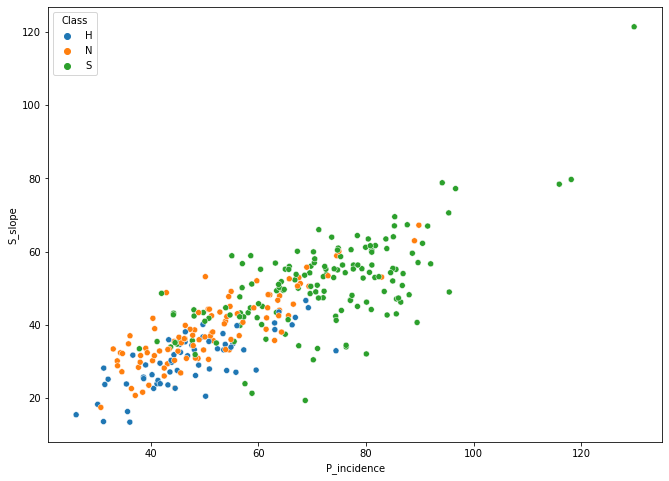

In [44]:
#ploting corellated plots

sns.scatterplot(x =  'P_incidence',y = 'S_slope',data = data,hue = 'Class')
plt.show()

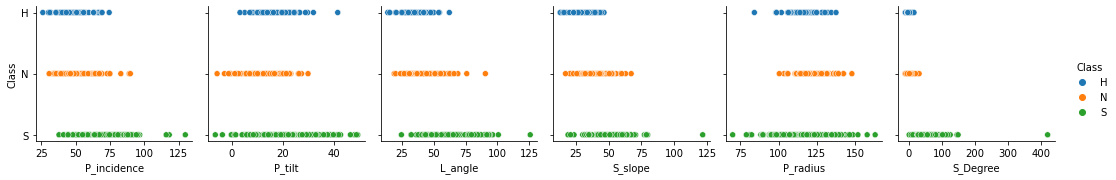

In [45]:
# lets us check how target variable is related with features
sns.pairplot(data = data,x_vars=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree'],
    y_vars=['Class'],hue = 'Class')

# stats analysis

In [46]:
df = data.groupby('Class').mean()
df

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
H,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
N,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
S,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687


In [47]:
# Performing Ztest for mean for numerical independent samples 
# H0 = means are Equal
# Ha = mans are not equal

# as there more than two samples we use 1 way anova 

from scipy.stats import f_oneway

fn = (data['Class'] == 'N')
fs = (data['Class'] == 'S')
fh = (data['Class'] == 'H')

for c in data.columns[:-1]:
    samplen = data.loc[fn,c]
    sampleh = data.loc[fh,c]
    samples = data.loc[fs,c]
    
    stats,p_val = f_oneway(samplen,samples,sampleh)
    #print(p_val)

    if (p_val < 0.05):
        print("There is there is significant difference in mean btw '",c,"' samples and we reject null hypothesis \n")
    else:
        print("There is there no significant difference in means btw ''",c,"'' samples so we failed to reject null hypothesis \n")


There is there is significant difference in mean btw ' P_incidence ' samples and we reject null hypothesis 

There is there is significant difference in mean btw ' P_tilt ' samples and we reject null hypothesis 

There is there is significant difference in mean btw ' L_angle ' samples and we reject null hypothesis 

There is there is significant difference in mean btw ' S_slope ' samples and we reject null hypothesis 

There is there is significant difference in mean btw ' P_radius ' samples and we reject null hypothesis 

There is there is significant difference in mean btw ' S_Degree ' samples and we reject null hypothesis 



## building Model 

In [48]:
# Segregate predictors vs target attributes
X = data.drop('Class',axis = 1) #predictors
y = data['Class']#target

In [49]:
cols = X.columns
X.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,74.565015,15.724320,58.618582,58.840695,105.417304,0.599247
1,69.781006,13.777465,58.000000,56.003541,118.930666,17.914560
2,46.855781,15.351514,38.000000,31.504267,116.250917,1.662706
3,74.005541,21.122402,57.379502,52.883139,120.205963,74.555166
4,63.959522,16.060945,63.123736,47.898577,142.360125,6.298971


In [50]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [51]:
y.head()

0    N
1    S
2    H
3    S
4    N
Name: Class, dtype: category
Categories (3, object): ['H', 'N', 'S']

<h5>Note : </h5> Only target variable is object type and it is need to converted into integer type.
We do it usng Label encoder from slearn module 

In [52]:
#importing label encoder
le = LabelEncoder()
le.fit(y)

y = le.transform(y)

In [53]:
# • Check for target balancing
np.unique(y,return_counts = True)

(array([0, 1, 2]), array([ 60, 100, 150], dtype=int64))

We can see there are 6:10:15 ratio

In [54]:
# Performing Scaling and then spliting train-test using Sklearn 

sc = MinMaxScaler()
sc.fit(X)

MinMaxScaler()

In [55]:
X_scaled = pd.DataFrame(sc.transform(X))
X_scaled.columns = cols
cols

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree'], dtype='object')

In [56]:
X_scaled.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,0.466958,0.397938,0.399299,0.420809,0.379990,0.027135
1,0.420819,0.363164,0.393763,0.394555,0.525313,0.067441
2,0.199717,0.391279,0.214780,0.167841,0.496495,0.029611
3,0.461562,0.494355,0.388210,0.365679,0.539028,0.199286
4,0.364674,0.403950,0.439616,0.319552,0.777274,0.040403


In [57]:
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,0.331276,0.166237,0.0,0.195613,0.313862,0.450685,1.0
P_tilt,310.0,0.430419,0.178762,0.0,0.307608,0.409251,0.512180,1.0
L_angle,310.0,0.339450,0.166043,0.0,0.205831,0.318253,0.438509,1.0
S_slope,310.0,0.273794,0.124216,0.0,0.184895,0.268714,0.363946,1.0
P_radius,310.0,0.514452,0.143215,0.0,0.436900,0.518189,0.595613,1.0
S_Degree,310.0,0.086952,0.087428,0.0,0.029474,0.053133,0.121847,1.0


In [58]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size =0.3,random_state =1,shuffle = True,stratify = y)

In [59]:
Counter(y_train)

Counter({1: 70, 2: 105, 0: 42})

<AxesSubplot:xlabel='S_Degree'>

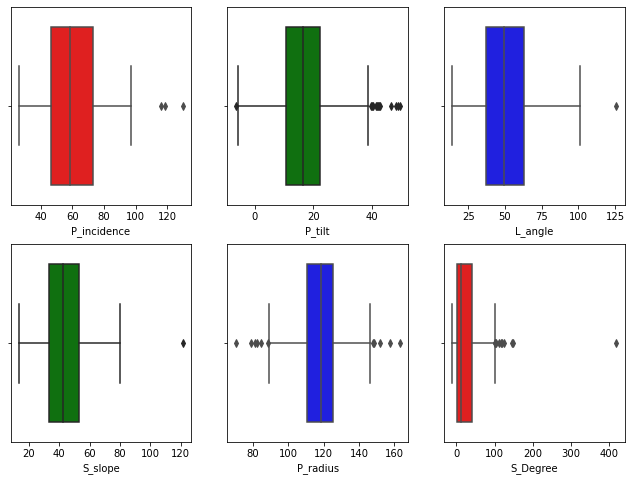

In [60]:
plt.subplot(2,3,1)
sns.boxplot(x = 'P_incidence',data = X,color = 'red')

plt.subplot(2,3,2)
sns.boxplot(x = 'P_tilt',data = X,color = 'green')

plt.subplot(2,3,3)
sns.boxplot(x = 'L_angle',data = X,color = 'blue')

plt.subplot(2,3,4)
sns.boxplot(x = 'S_slope',data = X,color = 'green')

plt.subplot(2,3,5)
sns.boxplot(x = 'P_radius',data = X,color = 'blue')
plt.subplot(2,3,6)
sns.boxplot(x = 'S_Degree',data = X,color = 'red')

# Implementing KNN Clasifier 

In [61]:
# model with outliers
knn = KNeighborsClassifier(n_neighbors = 3,weights = 'distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [62]:
def get_accuracy(test,pred):
    score = 0
    if len(test) == len(pred):
        for i in range(len(test)):
            if test[i] == pred[i]:
                score += 1
        accuracy = (score/len(test))*100
        print(round(accuracy,2),"% accuracy")
    
    else:
        print('Size Error : test and pred are not of same size')
            

In [63]:
ypred = knn.predict(X_test)

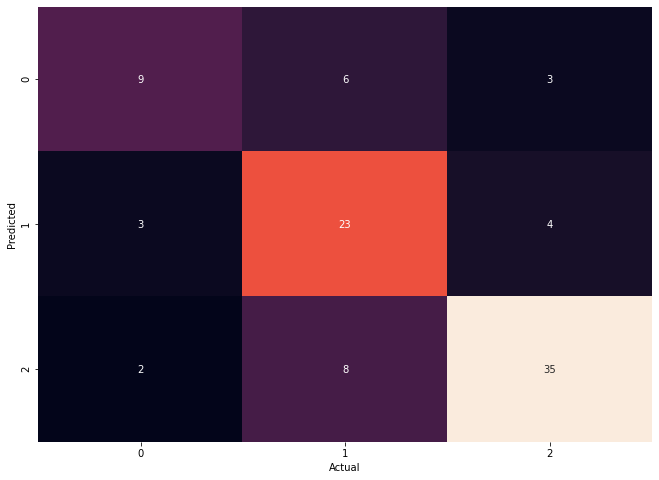

In [64]:
cf = confusion_matrix(y_test,ypred)
sns.heatmap(cf,annot = True,cbar = False)
plt.xlabel('Actual') 
plt.ylabel('Predicted')
plt.show()

In [65]:
get_accuracy(y_test,ypred)

72.04 % accuracy


In [66]:
recall_score(y_test,ypred,labels = [0,1,2],average = 'macro')

0.6814814814814815

In [67]:
cr = classification_report(y_test,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.64      0.50      0.56        18
           1       0.62      0.77      0.69        30
           2       0.83      0.78      0.80        45

    accuracy                           0.72        93
   macro avg       0.70      0.68      0.68        93
weighted avg       0.73      0.72      0.72        93



In [68]:
k=[1,3,5,7,9,11,13,15,17,19]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.6989247311827957:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.57      0.44      0.50        18
           1       0.59      0.73      0.66        30
           2       0.83      0.78      0.80        45

    accuracy                           0.70        93
   macro avg       0.67      0.65      0.65        93
weighted avg       0.71      0.70      0.70        93

Accuracy on Training data for k 3 is 0.9032258064516129:
Accuracy on Test data for k 3 is 0.7204301075268817:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.58      0.61      0.59        18
           1       0.63      0.73      0.68        30
           2       0.87      0.76      0.81        45

    accuracy                           0.72        93
   macro avg       0.69      0.70      0.69        93
weighted avg       0.74      0.72     

<ul>
    <li>if We select <b>k = 11</b> .it has</li>
    <ol>
        <li>Accuracy on Training data for k 11 is 0.815668202764977</li>
        <li>Accuracy on Test data for k 11 is 0.7956989247311828</li>
    </ol><br>
    <li>if we select <b>k = 15</b>. it has</li>
    <ol>
        <li>Accuracy on Training data for k 15 is 0.8202764976958525</li>
        <li>Accuracy on Test data for k 15 is 0.7956989247311828</li>
    </ol>
</ul>

In [69]:
# hyper tuining Parameters 
params={
'n_neighbors' : np.arange(1,50),
'weights' : ['uniform','distance'],
'algorithm' : ['auto','ball_tree', 'kd_tree', 'brute']
}

kf = KFold(n_splits=5)

knn2 = KNeighborsClassifier(metric = 'euclidean')
gd = GridSearchCV(estimator = knn2, param_grid = params, cv=kf)

gd.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [70]:
selection = pd.DataFrame(gd.cv_results_)
selection[['param_algorithm','param_n_neighbors','param_weights','mean_test_score']].sort_values(by = 'mean_test_score',ascending = False).head(10)


,param_algorithm,param_n_neighbors,param_weights,mean_test_score
0,auto,1,uniform,0.82463
98,ball_tree,1,uniform,0.82463
297,brute,2,distance,0.82463
295,brute,1,distance,0.82463
294,brute,1,uniform,0.82463
199,kd_tree,2,distance,0.82463
197,kd_tree,1,distance,0.82463
1,auto,1,distance,0.82463
101,ball_tree,2,distance,0.82463
99,ball_tree,1,distance,0.82463


In [71]:
print(gd.best_score_)
gd.best_params_

0.8246300211416491


{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

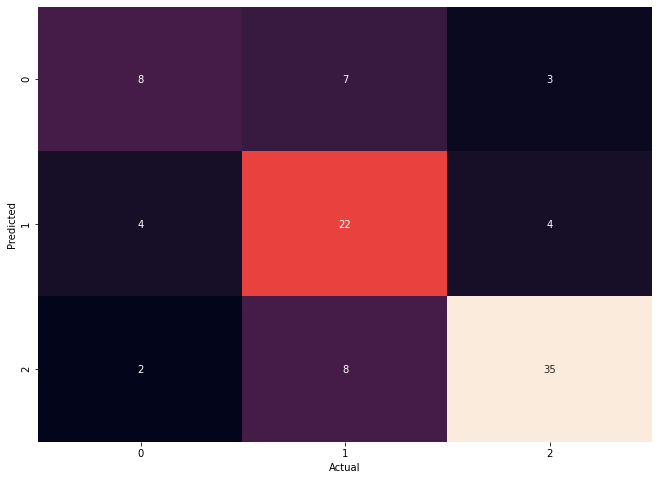

              precision    recall  f1-score   support

           0       0.57      0.44      0.50        18
           1       0.59      0.73      0.66        30
           2       0.83      0.78      0.80        45

    accuracy                           0.70        93
   macro avg       0.67      0.65      0.65        93
weighted avg       0.71      0.70      0.70        93



In [72]:
params = gd.best_params_ 
hyper_knn = KNeighborsClassifier(algorithm= params['algorithm'], n_neighbors= params['n_neighbors'], weights= params['weights'])
hyper_knn.fit(X_train,y_train)
y_pred = hyper_knn.predict(X_test)
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot = True,cbar = False)
plt.xlabel('Actual') 
plt.ylabel('Predicted')
plt.show()

cr = classification_report(y_test,y_pred)
print(cr)

In [73]:
get_accuracy(y_test,y_pred)

69.89 % accuracy


### ------ Handling outliers ----------

<AxesSubplot:xlabel='S_Degree'>

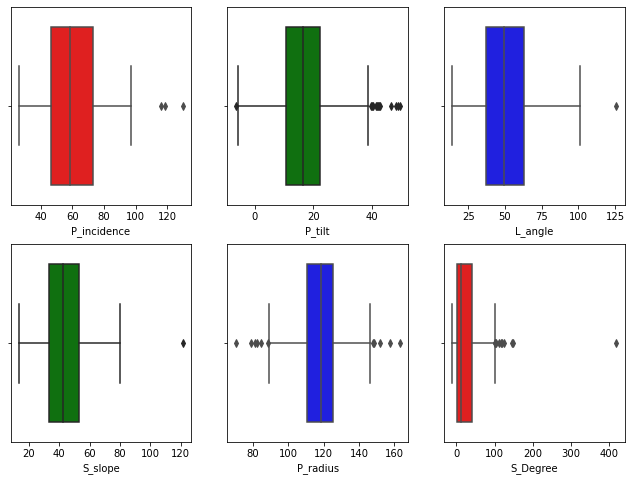

In [74]:
plt.subplot(2,3,1)
sns.boxplot(x = 'P_incidence',data = X,color = 'red',whis=1.5)

plt.subplot(2,3,2)
sns.boxplot(x = 'P_tilt',data = X,color = 'green',whis=1.5)

plt.subplot(2,3,3)
sns.boxplot(x = 'L_angle',data = X,color = 'blue',whis=1.5)

plt.subplot(2,3,4)
sns.boxplot(x = 'S_slope',data = X,color = 'green',whis=1.5)

plt.subplot(2,3,5)
sns.boxplot(x = 'P_radius',data = X,color = 'blue',whis=1.5)
plt.subplot(2,3,6)
sns.boxplot(x = 'S_Degree',data = X,color = 'red',whis=1.5)

In [75]:
handle_X = X.copy()
for c in handle_X.columns:
    q1 = handle_X[c].quantile(.25)
    q3 = handle_X[c].quantile(.75)
    #print(c,q1,q3)
    IQR = q3-q1
    up = q3 + (IQR * 1.5)
    down = q1 - (1.5 * IQR)
    
    
    up_f = handle_X[c] >= up
    down_f = handle_X[c] <= down
    
    # replacing all the outliers with mean
    handle_X.loc[up_f,c] = handle_X[c].mean()
    handle_X.loc[up_f,c] = handle_X[c].mean()

<AxesSubplot:xlabel='S_Degree'>

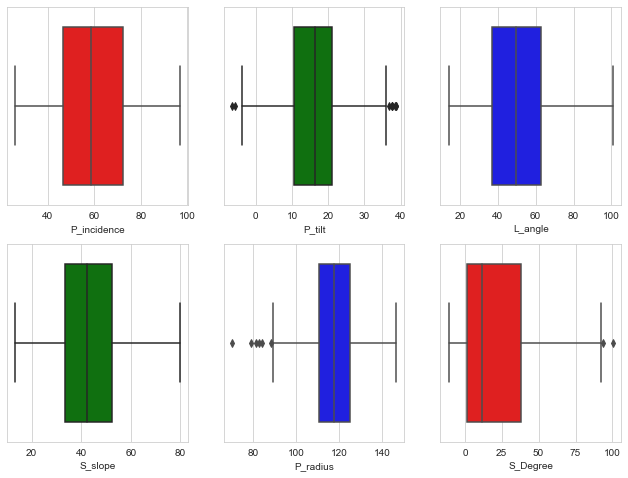

In [76]:
sns.set_style("whitegrid")
plt.subplot(2,3,1)
sns.boxplot(x = 'P_incidence',data = handle_X,color = 'red')
#sns.swarmplot(x = 'P_incidence', data=handle_X, color=".25")

plt.subplot(2,3,2)
sns.boxplot(x = 'P_tilt',data = handle_X,color = 'green',whis=1.5)
#sns.swarmplot(x = 'P_incidence', data=handle_X, color=".25")

plt.subplot(2,3,3)
sns.boxplot(x = 'L_angle',data = handle_X,color = 'blue')
#sns.swarmplot(x = 'P_incidence', data=handle_X, color=".25")

plt.subplot(2,3,4)
sns.boxplot(x = 'S_slope',data = handle_X,color = 'green')
#sns.swarmplot(x = 'P_incidence', data=handle_X, color=".25")

plt.subplot(2,3,5)
sns.boxplot(x = 'P_radius',data = handle_X,color = 'blue')
#sns.swarmplot(x = 'P_incidence', data=handle_X, color=".25")
plt.subplot(2,3,6)

sns.boxplot(x = 'S_Degree',data = handle_X,color = 'red')
#sns.swarmplot(x = 'P_incidence', data=handle_X, color=".25")

              precision    recall  f1-score   support

           0       0.52      0.87      0.65        15
           1       0.92      0.66      0.77        35
           2       0.95      0.95      0.95        43

    accuracy                           0.83        93
   macro avg       0.80      0.83      0.79        93
weighted avg       0.87      0.83      0.83        93



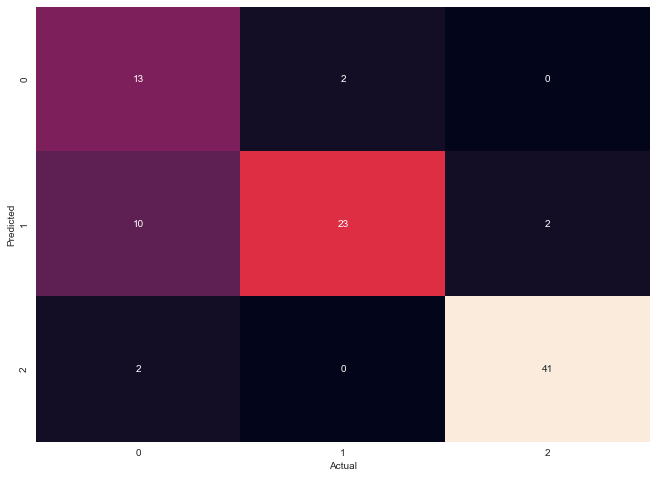

In [77]:
sc = MinMaxScaler()
sc.fit(handle_X)

handle_X_scaled = pd.DataFrame(sc.transform(handle_X))
handle_X_train, handle_X_test, handle_y_train, handle_y_test = train_test_split(handle_X_scaled,y,test_size =0.3,
                                                                                random_state =1,shuffle = True)

h_knn = KNeighborsClassifier( n_neighbors= 15, metric = 'euclidean')
h_knn.fit(handle_X_train,handle_y_train)
handle_y_pred = h_knn.predict(handle_X_test)

cr = classification_report(handle_y_test,handle_y_pred)
print(cr)

handle_cf = confusion_matrix(handle_y_test,handle_y_pred)
sns.heatmap(handle_cf,annot = True,cbar = False)
plt.xlabel('Actual') 
plt.ylabel('Predicted')
plt.show()

In [78]:
k=[1,3,5,7,9,11,13,15,17,19]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(handle_X_train,handle_y_train)
    predicted_labels = KNN.predict(handle_X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(handle_X_train,handle_y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(handle_X_test, handle_y_test)))
    print("classification  Matrix:\n",classification_report(handle_y_test,predicted_labels))

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.8279569892473119:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.52      0.73      0.61        15
           1       0.84      0.74      0.79        35
           2       0.98      0.93      0.95        43

    accuracy                           0.83        93
   macro avg       0.78      0.80      0.78        93
weighted avg       0.85      0.83      0.84        93

Accuracy on Training data for k 3 is 0.8755760368663594:
Accuracy on Test data for k 3 is 0.8387096774193549:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.50      0.87      0.63        15
           1       0.92      0.69      0.79        35
           2       1.00      0.95      0.98        43

    accuracy                           0.84        93
   macro avg       0.81      0.84      0.80        93
weighted avg       0.89      0.84     

Accuracy on Training data for k 5 is 0.8709677419354839<br>
Accuracy on Test data for k 5 is 0.8494623655913979

### ----  After handling  imbalance -----

In [79]:
#handling imbalance 
smote = SMOTE(k_neighbors=11)
sm_Xtrain,sm_ytrain = smote.fit_resample(X_train,y_train)


print("Before Smote \n",Counter(y_train),"\n ","-"*100)
print("Before Smote \n",Counter(sm_ytrain),"\n ","-"*100)

sm_knn = KNeighborsClassifier(n_neighbors = 5)
sm_knn.fit(sm_Xtrain,sm_ytrain)

Before Smote 
 Counter({2: 105, 1: 70, 0: 42}) 
  ----------------------------------------------------------------------------------------------------
Before Smote 
 Counter({1: 105, 2: 105, 0: 105}) 
  ----------------------------------------------------------------------------------------------------


KNeighborsClassifier()

In [80]:
sm_ypred = sm_knn.predict(X_test)

cr = classification_report(y_test,sm_ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.52      0.78      0.62        18
           1       0.58      0.60      0.59        30
           2       0.91      0.71      0.80        45

    accuracy                           0.69        93
   macro avg       0.67      0.70      0.67        93
weighted avg       0.73      0.69      0.70        93



In [81]:
get_accuracy(y_test,sm_ypred)

68.82 % accuracy


In [82]:
k=[1,3,5,7,9,11,13,15,17,19,21,23]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(sm_Xtrain, sm_ytrain)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(sm_Xtrain, sm_ytrain)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))
    print('-'*60)

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.7311827956989247:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.65      0.61      0.63        18
           1       0.65      0.73      0.69        30
           2       0.83      0.78      0.80        45

    accuracy                           0.73        93
   macro avg       0.71      0.71      0.71        93
weighted avg       0.74      0.73      0.73        93

------------------------------------------------------------
Accuracy on Training data for k 3 is 0.9365079365079365:
Accuracy on Test data for k 3 is 0.6666666666666666:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.50      0.67      0.57        18
           1       0.56      0.63      0.59        30
           2       0.89      0.69      0.78        45

    accuracy                           0.67        93
   macro avg       0.65      0.

# we can see Smote is not is helping 
Accuracy on Training data for k 21 is 0.8317460317460318<br>
Accuracy on Test data for k 21 is 0.8172043010752689

Before Smote 
 Counter({2: 107, 1: 65, 0: 45}) 
  ----------------------------------------------------------------------------------------------------
Before Smote 
 Counter({2: 107, 1: 107, 0: 107}) 
  ----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.44      0.73      0.55        15
           1       0.85      0.66      0.74        35
           2       1.00      0.95      0.98        43

    accuracy                           0.81        93
   macro avg       0.76      0.78      0.76        93
weighted avg       0.85      0.81      0.82        93



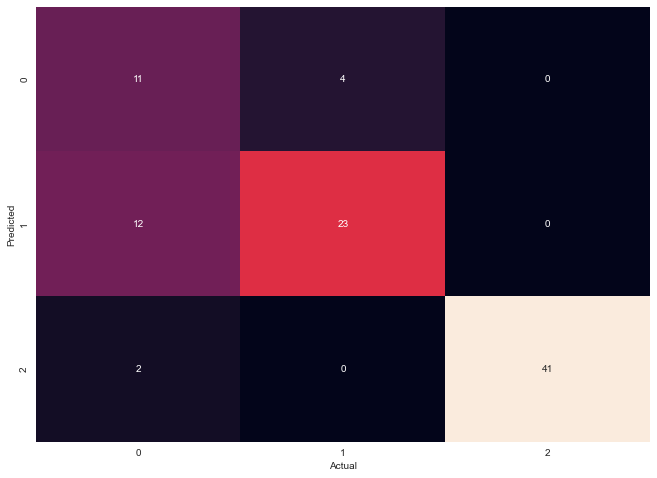

In [83]:
#handling outliers and imbalance 
smote = SMOTE(k_neighbors=11)
handle_sm_Xtrain,handle_sm_ytrain = smote.fit_resample(handle_X_train,handle_y_train)


print("Before Smote \n",Counter(handle_y_train),"\n ","-"*100)
print("Before Smote \n",Counter(handle_sm_ytrain),"\n ","-"*100)

sm_knn = KNeighborsClassifier( n_neighbors= 3)
sm_knn.fit(handle_sm_Xtrain,handle_sm_ytrain)

handle_sm_ypred = sm_knn.predict(handle_X_test)

cr = classification_report(handle_y_test,handle_sm_ypred)
print(cr)

handle_sm_cf = confusion_matrix(handle_y_test,handle_sm_ypred)
sns.heatmap(handle_sm_cf,annot = True,cbar = False)
plt.xlabel('Actual') 
plt.ylabel('Predicted')
plt.show()

In [84]:
k=[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(sm_Xtrain, sm_ytrain)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(sm_Xtrain, sm_ytrain)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))
    print('-'*60)

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.7311827956989247:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.65      0.61      0.63        18
           1       0.65      0.73      0.69        30
           2       0.83      0.78      0.80        45

    accuracy                           0.73        93
   macro avg       0.71      0.71      0.71        93
weighted avg       0.74      0.73      0.73        93

------------------------------------------------------------
Accuracy on Training data for k 3 is 0.9365079365079365:
Accuracy on Test data for k 3 is 0.6666666666666666:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.50      0.67      0.57        18
           1       0.56      0.63      0.59        30
           2       0.89      0.69      0.78        45

    accuracy                           0.67        93
   macro avg       0.65      0.

Accuracy on Training data for k 23 is 0.8253968253968254[k=3]
Accuracy on Test data for k 23 is 0.8172043010752689
    
Accuracy on Training data for k 21 is 0.8317460317460318[k = 5]
Accuracy on Test data for k 21 is 0.8172043010752689

# Conclusions 

###### 1. Getteng better Accuracy when we handle outlier and setting k = 5
###### 2. imbalance handling is not that accurate using smote 
###### 3. May be using SVM helps in predicting with Good accuracy
###### 4. independent variables P_incidence , S_slope  are 80% positively colinear 
###### 5. there some perecent of data imbalance  even handling imbalance using smote knn is not able provide better accuracy


# ###################################################################

<h1> END PART 1 </h1> 

# ###################################################################

<style>
.h1 {color: red}
</style>

<h1 class ='h1'> Project Part 2 </h1>

## Project Description 

<h6><b> DOMAIN:</b></h6> Banking and finance
<h6><b> • CONTEXT:</b></h6> A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee
majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the
borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an
average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing
department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit
with same budget as per last campaign.
<h6><b> • DATA DESCRIPTION:</b></h6> The data consists of the following attributes:

1. ID: Customer ID
2. Age Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.

In [85]:
#importing datasets
data1 = pd.read_csv('Part2 - Data1.csv')
data2 = pd.read_csv('Part2 -Data2.csv')

## Understanding  dataset 1


In [86]:
data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [87]:
print("shape = ",data1.shape,"\n")
print('*'*50)
print("datatypes of independent variable : \n",'-'*50,"\n")
print(data1.dtypes,"\n")
print('*'*50)
print("Missing Values count : \n",'-'*50,"\n")
print(data1.isnull().sum(),"\n")
print('*'*50)

shape =  (5000, 8) 

**************************************************
datatypes of independent variable : 
 -------------------------------------------------- 

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object 

**************************************************
Missing Values count : 
 -------------------------------------------------- 

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
dtype: int64 

**************************************************


## Understanding  dataset 2

In [88]:
data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [89]:
print("shape = ",data2.shape,"\n")
print('*'*50)
print("datatypes of independent variable : \n",'-'*50,"\n")
print(data2.dtypes,"\n")
print('*'*50)
print("Missing Values count : \n",'-'*50,"\n")
print(data2.isnull().sum(),"\n")
print('*'*50)

shape =  (5000, 7) 

**************************************************
datatypes of independent variable : 
 -------------------------------------------------- 

ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object 

**************************************************
Missing Values count : 
 -------------------------------------------------- 

ID                      0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64 

**************************************************


# ---------------------------------------------------------------------------------------------

In [90]:
# merging the dataset 
data3 = pd.merge(data1,data2,on = 'ID',how ='outer')

In [91]:
data3.head(10)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
5,6,37,13,29,92121,4,0.4,2,155,0,0,1,0,NaN
6,7,53,27,72,91711,2,1.5,2,0,0,0,1,0,NaN
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,1,NaN
8,9,35,10,81,90089,3,0.6,2,104,0,0,1,0,NaN
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0


In [92]:
print("shape = ",data3.shape,"\n")
print('*'*50)
print("datatypes of independent variable : \n",'-'*50,"\n")
print(data3.dtypes,"\n")
print('*'*50)
print("Missing Values count : \n",'-'*50,"\n")
print(data3.isnull().sum(),"\n")
print('*'*50)

shape =  (5000, 14) 

**************************************************
datatypes of independent variable : 
 -------------------------------------------------- 

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object 

**************************************************
Missing Values count : 
 -------------------------------------------------- 

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security               

# Data cleaning

<b> Count of missing values is less so we drop those rows</b>

In [93]:
# handling missing data using knn imputer from sklearn
data_fill = data3.dropna(axis = 0)

Here we are able to classify three of them into class 1 .so we will be use this model

In [94]:
cols = ['Age','CustomerSince','HighestSpend','HiddenScore','Level','Mortgage','Security',
        'FixedDepositAccount','InternetBanking','CreditCard','LoanOnCard']
for c in cols:
    data_fill[c] =data_fill[c].astype(int)
    
cat = []
for c in data_fill.columns:
    if (data_fill[c].value_counts().count()<=5):
        cat.append(c)
        
for c in cat:
    data_fill[c] =data_fill[c].astype('category')

C:\Users\PREM KUMAR\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [95]:
data_fill

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1
10,11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0
11,12,29,5,45,90277,3,0.1,2,0,0,0,1,0,0
12,13,48,23,114,93106,2,3.8,3,0,1,0,0,0,0
13,14,59,32,40,94920,4,2.5,2,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0


In [96]:
print("shape = ",data_fill.shape,"\n")
print('*'*50)
print("datatypes of independent variable : \n",'-'*50,"\n")
print(data_fill.dtypes,"\n")
print('*'*50)
print("Missing Values count : \n",'-'*50,"\n")
print(data_fill.isnull().sum(),"\n")
print('*'*50)

shape =  (4980, 14) 

**************************************************
datatypes of independent variable : 
 -------------------------------------------------- 

ID                        int64
Age                       int32
CustomerSince             int32
HighestSpend              int32
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int32
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object 

**************************************************
Missing Values count : 
 -------------------------------------------------- 

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security          

In [97]:
data_fill.LoanOnCard.value_counts()

0    4500
1     480
Name: LoanOnCard, dtype: int64

<b>NOTE :</b> we can  see only 481 people has loans and 4519 people not. if we can increase borrowers then we can acheive our goal of expanding

# Data visualization

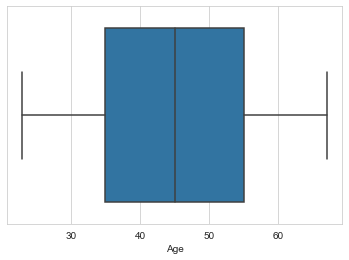

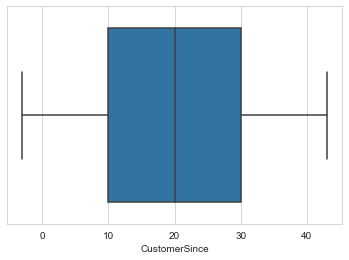

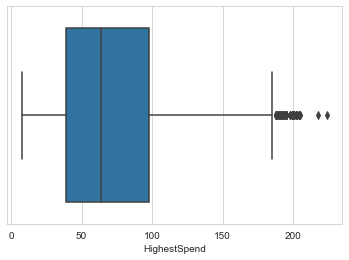

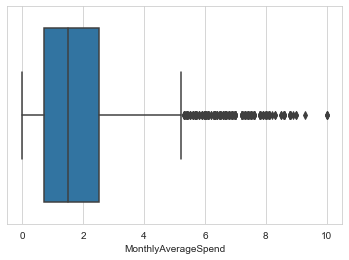

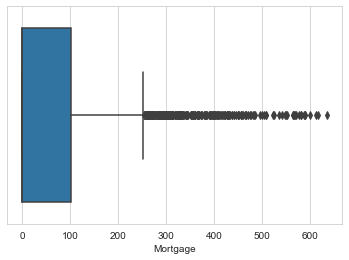

In [98]:
# checling for outliers 
cols = ['Age','CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage']

for c in cols:
    plt.figure(figsize =(6,4))
    sns.boxplot(x = c,data=data_fill)
    plt.show()
    

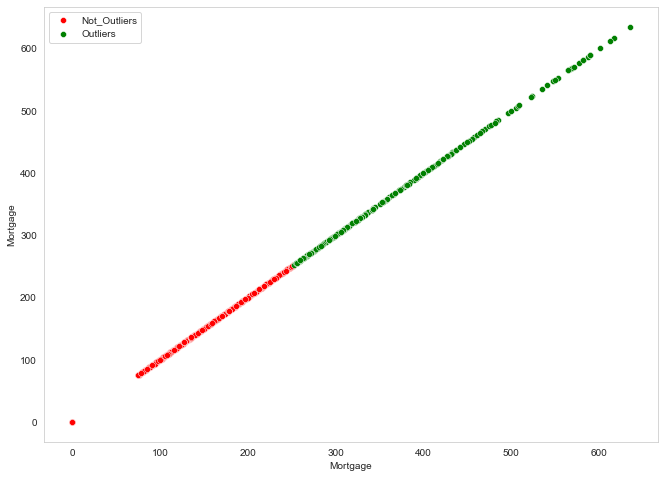

In [99]:
# plotting scater of mortage to understand it better
q1 = data_fill['Mortgage'].quantile(0.25)
q3 = data_fill['Mortgage'].quantile(0.75)

iqr = q3 - q1 
up = q3 + (1.5*iqr)
down = q1 - (1.5*iqr)


no_f = (data_fill['Mortgage'] < up) & (data_fill['Mortgage'] > down)
f= (data_fill['Mortgage']>up ) | (data_fill['Mortgage']<down)

non_out = data_fill.loc[no_f,'Mortgage'] #points btw q1 and q3 and wiscus
out = data_fill.loc[f,'Mortgage']


sns.scatterplot(x = non_out,y = data_fill['Mortgage'],color = 'r',label = 'Not_Outliers',markers = '*',sizes =0.5)

sns.scatterplot(x = out,y = data_fill['Mortgage'],color = 'g',label = 'Outliers',sizes =1)
plt.legend()
plt.grid()
plt.show()

<AxesSubplot:>

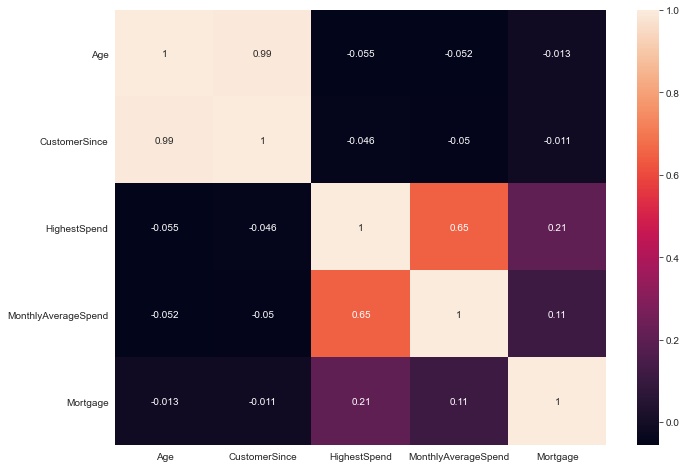

In [100]:
df = data_fill[['Age','CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage']]
sns.heatmap(df.corr(),annot =True)

In [101]:
visited = []
corr = df.corr()
col = corr.columns
for i in range(len(corr.columns)):
    for j in range((i+1),len(corr.columns)):
        x = col[i]
        y = col[j]
        if (corr.loc[x,y] > 0.8) :
            if (x in visited) == False:
                print("(",x,",",y,") are 80% positively colinear \n")
                    
        if(corr.loc[x,y] <- 0.8):
            if (x in visited) == False:
                print("(",x,",",y,") are 80% negatively colinear \n")
        visited.append(x)

( Age , CustomerSince ) are 80% positively colinear 



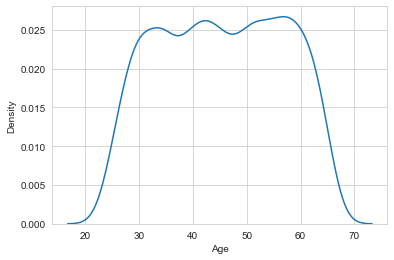

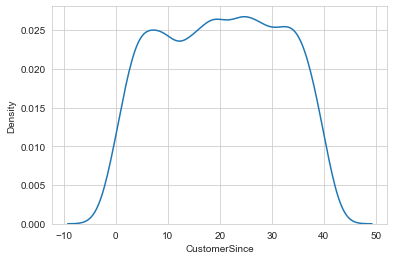

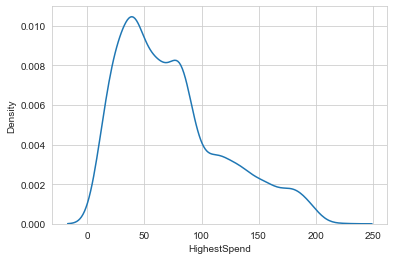

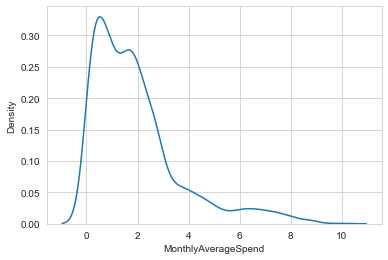

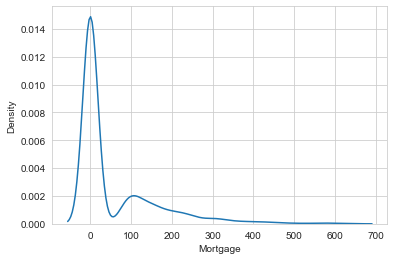

In [102]:
# understanding Distributon
cols = ['Age','CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage']

for c in cols:
    plt.figure(figsize =(6,4))
    sns.kdeplot(x = c,data=data_fill)
    plt.show()
    

<b> We can see how differently our numerical features are Spread  </b>

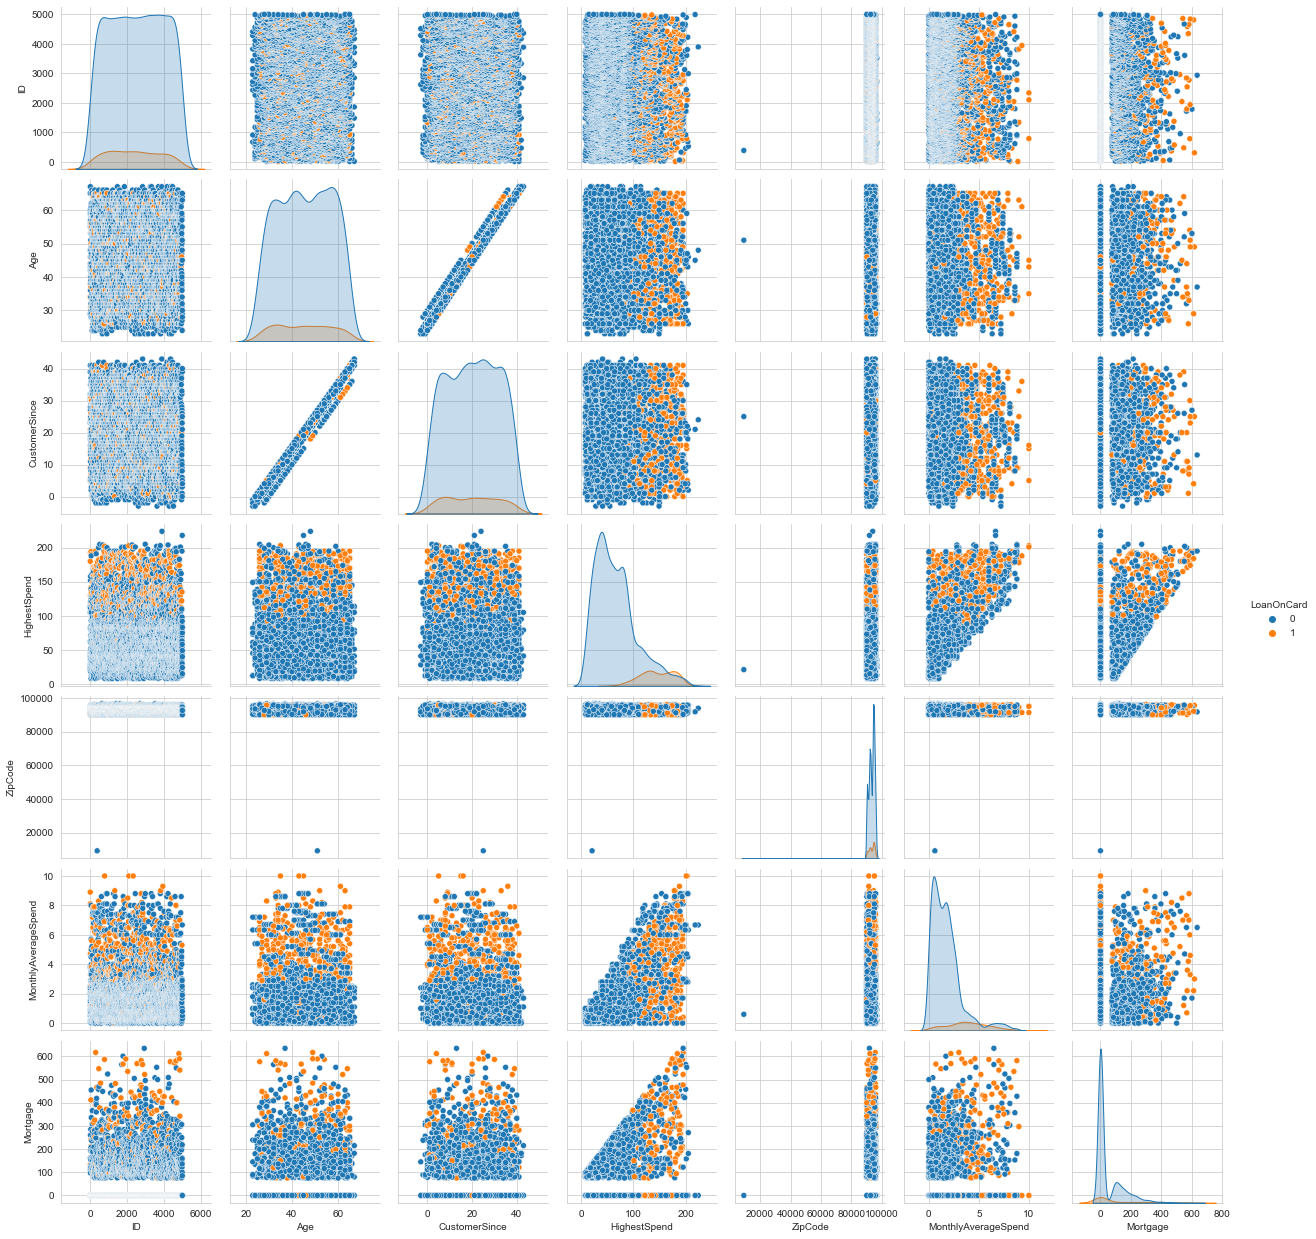

In [103]:
sns.pairplot(data_fill,hue ="LoanOnCard")
plt.show()

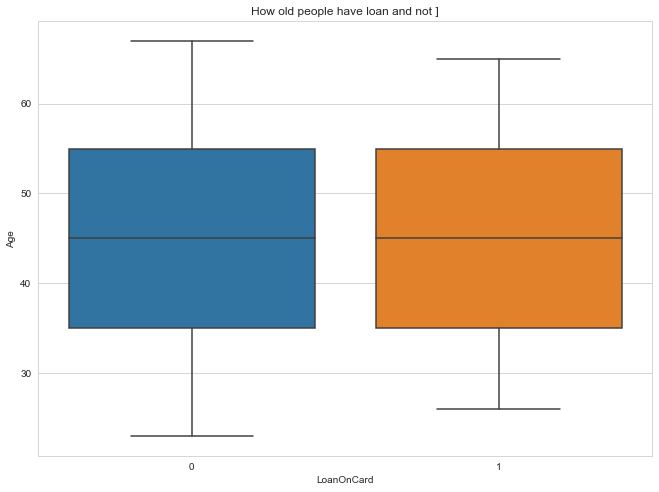

In [104]:
sns.boxplot(y ='Age',data=data_fill,x ='LoanOnCard')
plt.title("How old people have loan and not ]")
plt.show()
    

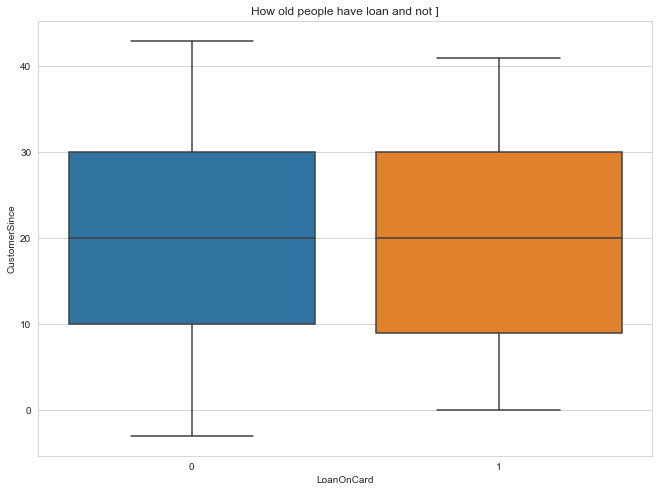

In [105]:
sns.boxplot(y ='CustomerSince',data=data_fill,x ='LoanOnCard')
plt.title("How old people have loan and not ]")
plt.show()

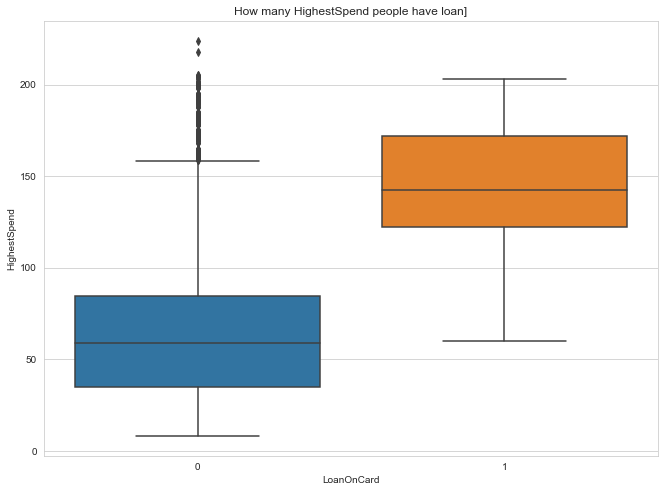

In [106]:
sns.boxplot(y ='HighestSpend',data=data_fill,x ='LoanOnCard')
plt.title("How many HighestSpend people have loan]")
plt.show()
    

<b> We can see People Who Spend Money more have Loans </b>

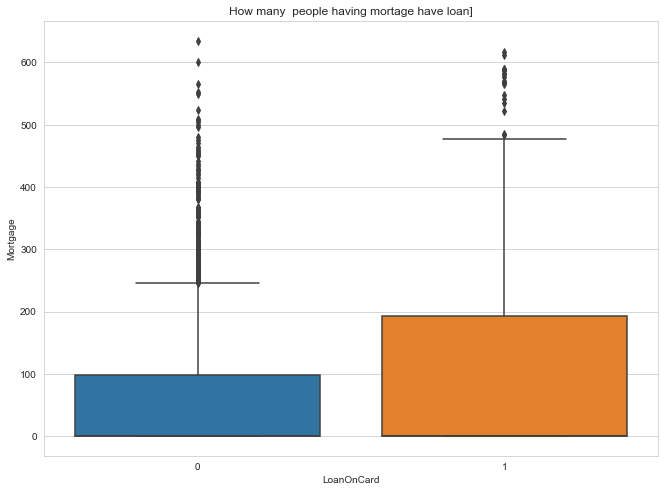

In [107]:
sns.boxplot(y ='Mortgage',data=data_fill,x ='LoanOnCard')
plt.title("How many  people having mortage have loan]")
plt.show()

<b> The count people who has mortage has taken loan is higher  </b>

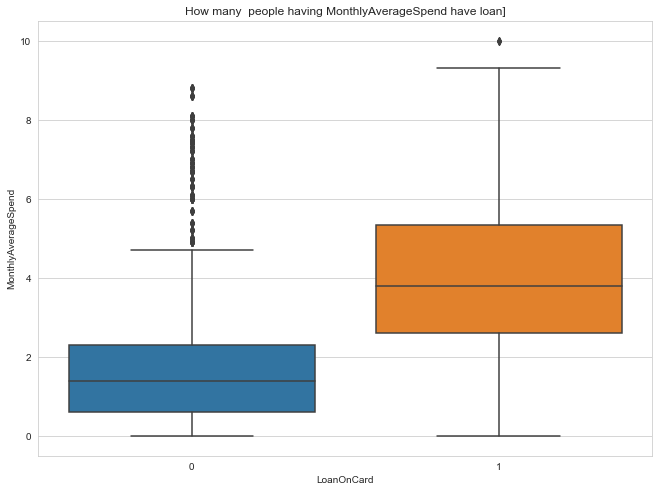

In [108]:
sns.boxplot(y ='MonthlyAverageSpend',data=data_fill,x ='LoanOnCard')
plt.title("How many  people having MonthlyAverageSpend have loan]")
plt.show()

<b> We can see The people who spends more montly has loan rather than people not </b>

#  --------------------------------------------------------------------------------------------

<h4> How Caterogical values have relation with dependent variable </h4>

# ----------------------------------------------------------------------------------------------

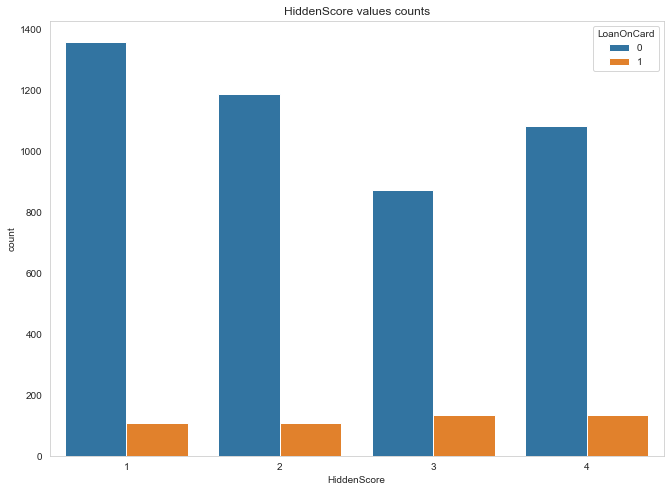

In [109]:
sns.countplot(x = 'HiddenScore',data = data_fill,hue ='LoanOnCard')
plt.grid(axis ='y')
plt.title("HiddenScore values counts")
plt.show()

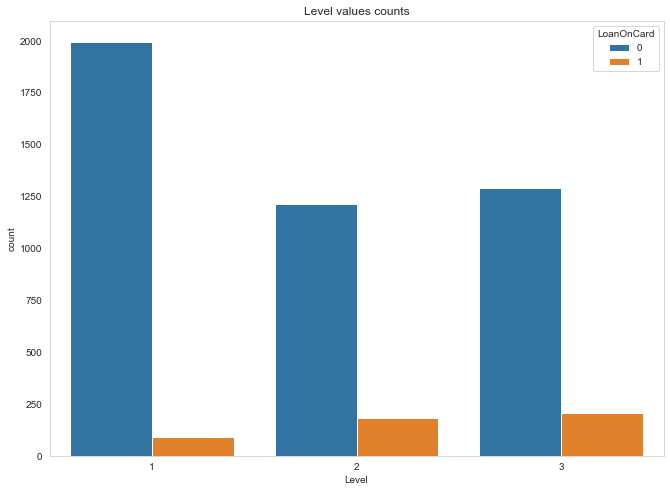

In [110]:
sns.countplot(x = 'Level',data = data_fill,hue ='LoanOnCard')
plt.grid(axis ='y')
plt.title("Level values counts")
plt.show()

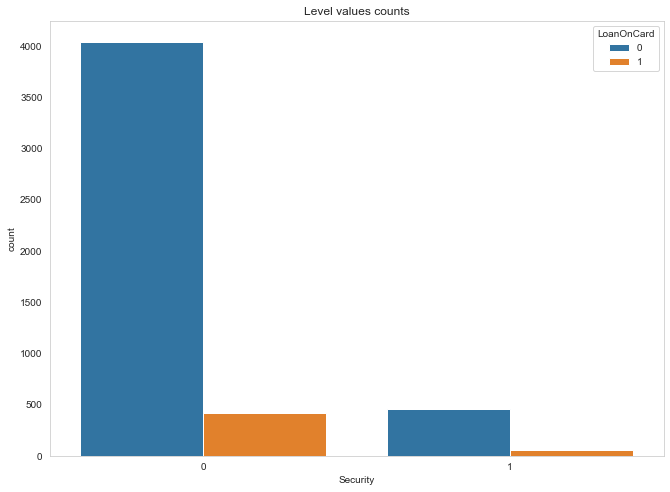

In [111]:
sns.countplot(x = 'Security',data = data_fill,hue ='LoanOnCard')
plt.grid(axis ='y')
plt.title("Level values counts")
plt.show()

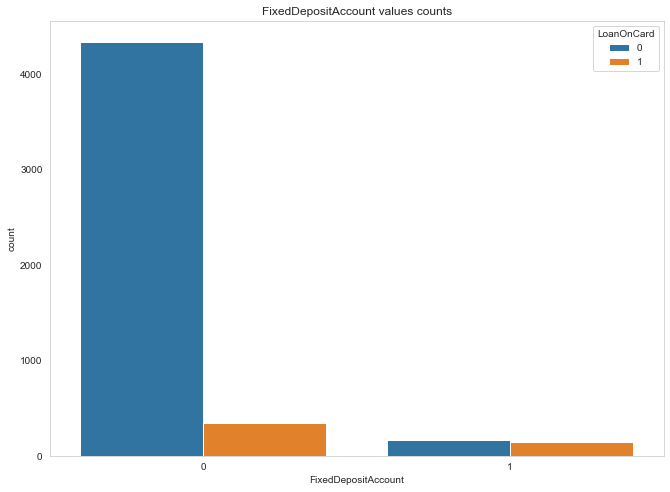

In [112]:
sns.countplot(x = 'FixedDepositAccount',data = data_fill,hue ='LoanOnCard')
plt.grid(axis ='y')
plt.title("FixedDepositAccount values counts")
plt.show()

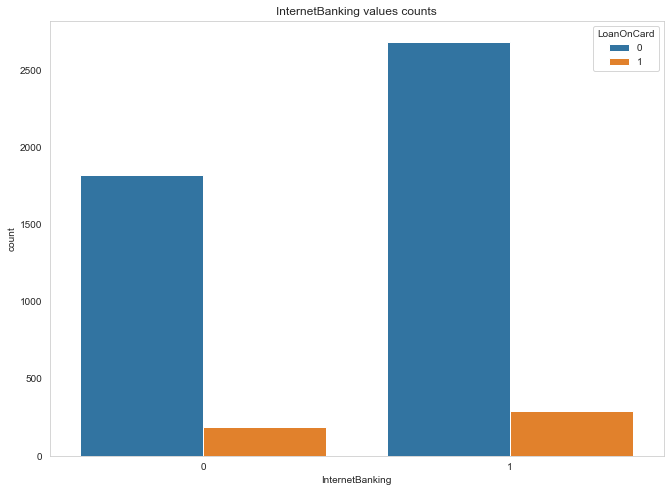

In [113]:
sns.countplot(x = 'InternetBanking',data = data_fill,hue ='LoanOnCard')
plt.grid(axis ='y')
plt.title("InternetBanking values counts")
plt.show()

<b> Even though having netbanking count of people taking loan is less </b>

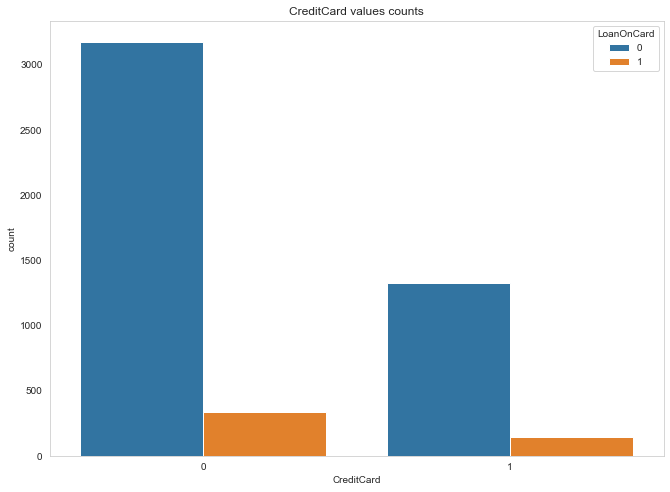

In [114]:
sns.countplot(x = 'CreditCard',data = data_fill,hue ='LoanOnCard')
plt.grid(axis ='y')
plt.title("CreditCard values counts")
plt.show()

<b> Even though having credit card count of people taking loan is less </b>

#  Statistical Analysis 

In [115]:
num_cols = ['Age','CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage','LoanOnCard']
cat_cols = ['HiddenScore','Security','FixedDepositAccount','InternetBanking','CreditCard']

# Sampling data based on loanoncard
num_df = data_fill[num_cols].groupby('LoanOnCard').mean()
num_df

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage
LoanOnCard,,,,,
0,45.383111,20.146889,66.290444,1.729849,51.869111
1,45.066667,19.843750,144.745833,3.905354,100.845833


In [116]:
# Performing Ztest for mean for numerical independent samples 
# H0 = means are Equal
# Ha = mans are not equal

f0 = (data_fill['LoanOnCard'] == 0)
f1 = (data_fill['LoanOnCard'] == 1)

for c in num_cols[:-1]:
    sample0 = data_fill.loc[f0,c]
    sample1 = data_fill.loc[f1,c]
    stats,p_val = ztest(sample0,sample1)
    round_p=round(p_val,2)

    if round_p<0.05:
        print("There is there is significant difference in mean btw '",c,"' samples and we reject null hypothesis \n")
    else:
        print("There is there no significant difference in means btw ''",c,"'' samples so we failed to reject null hypothesis \n")


There is there no significant difference in means btw '' Age '' samples so we failed to reject null hypothesis 

There is there no significant difference in means btw '' CustomerSince '' samples so we failed to reject null hypothesis 

There is there is significant difference in mean btw ' HighestSpend ' samples and we reject null hypothesis 

There is there is significant difference in mean btw ' MonthlyAverageSpend ' samples and we reject null hypothesis 

There is there is significant difference in mean btw ' Mortgage ' samples and we reject null hypothesis 



In [117]:
#The Pearson’s chi-squared statistical hypothesis is an example of a test for independence between categorical variables.
# H₀: The two categorical variables have no relationship [dependent and independent]
# H₁: There is a relationship between two categorical variables [dependent and independent]
cat_cols = ['HiddenScore','Security','FixedDepositAccount','InternetBanking','CreditCard']

for c in cat_cols:
    crosstab=pd.crosstab(data_fill['LoanOnCard'],data_fill[c])
    #rint(crosstab)

    chi,p_value,dof,expected=chi2_contingency(crosstab)

    round_p=round(p_val,2)
    if round_p<0.05:
        print("There is there is significant difference in  '",c,"','LoanOnCard' samples and we reject null hypothesis \n")
    else:
        print("There is there no significant difference in means btw ''",c,"'','LoanOnCard' samples so we failed to reject null hypothesis \n")


There is there is significant difference in  ' HiddenScore ','LoanOnCard' samples and we reject null hypothesis 

There is there is significant difference in  ' Security ','LoanOnCard' samples and we reject null hypothesis 

There is there is significant difference in  ' FixedDepositAccount ','LoanOnCard' samples and we reject null hypothesis 

There is there is significant difference in  ' InternetBanking ','LoanOnCard' samples and we reject null hypothesis 

There is there is significant difference in  ' CreditCard ','LoanOnCard' samples and we reject null hypothesis 



# ------- Model Building -----------

In [157]:
# Segregate predictors vs target attributes

x_cols = ['Age','CustomerSince','HighestSpend','MonthlyAverageSpend','HiddenScore','Level','Mortgage','Security','FixedDepositAccount','InternetBanking','CreditCard']

X = data_fill[x_cols]
y = data_fill['LoanOnCard']


In [158]:
X.head()

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,HiddenScore,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
9,34,9,180,8.9,1,3,0,0,0,0,0
10,65,39,105,2.4,4,3,0,0,0,0,0
11,29,5,45,0.1,3,2,0,0,0,1,0
12,48,23,114,3.8,2,3,0,1,0,0,0
13,59,32,40,2.5,4,2,0,0,0,1,0


In [120]:
y.values

[1, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 4980
Categories (2, int64): [0, 1]

In [144]:
sc = MinMaxScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X),columns = X.columns)

In [145]:
X_scaled.head()

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,HiddenScore,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,0.250000,0.260870,0.796296,0.89,0.000000,1.0,0.0,0.0,0.0,0.0,0.0
1,0.954545,0.913043,0.449074,0.24,1.000000,1.0,0.0,0.0,0.0,0.0,0.0
2,0.136364,0.173913,0.171296,0.01,0.666667,0.5,0.0,0.0,0.0,1.0,0.0
3,0.568182,0.565217,0.490741,0.38,0.333333,1.0,0.0,1.0,0.0,0.0,0.0
4,0.818182,0.760870,0.148148,0.25,1.000000,0.5,0.0,0.0,0.0,1.0,0.0


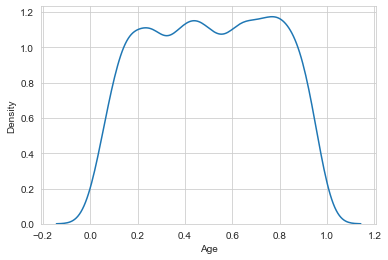

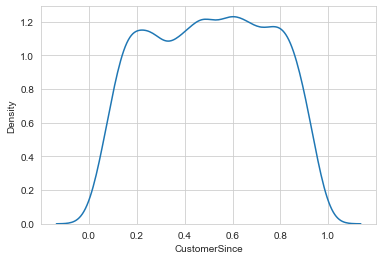

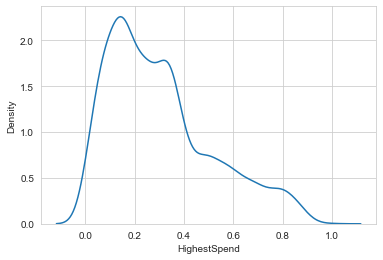

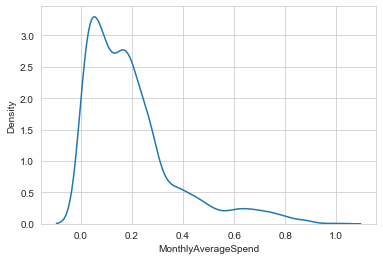

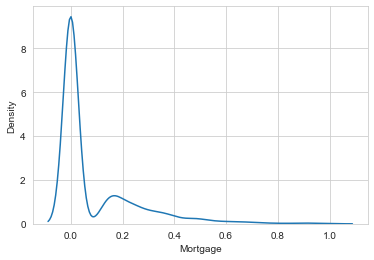

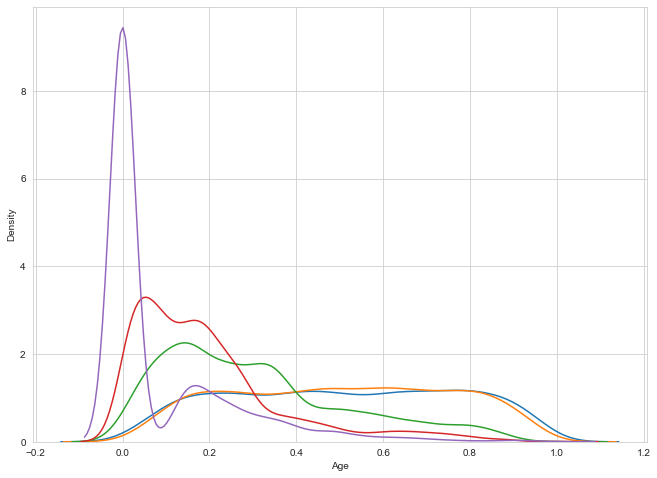

In [146]:
cols = ['Age','CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage']

for c in cols:
    plt.figure(figsize =(6,4))
    sns.kdeplot(x = c,data=X_scaled)
    plt.show()
    

sns.kdeplot(x = cols[0],data=X_scaled)
sns.kdeplot(x = cols[1],data=X_scaled)
sns.kdeplot(x = cols[2],data=X_scaled)
sns.kdeplot(x = cols[3],data=X_scaled)
sns.kdeplot(x = cols[4],data=X_scaled)
plt.show()

<b> We can see there is no difference in numerical features Spread is even after scaling but if we plot them onto one plot axis  then their means values is known   </b>

In [147]:
# Perform train-test split.
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.3,random_state =1)

##### let us see which are important feature based on chi2 test 

In [125]:
bf = SelectKBest(score_func = chi2,k =5)
fit = bf.fit(X_train,y_train)

score_df= pd.DataFrame(fit.scores_)
cols_df = pd.DataFrame(X_train.columns)
features_df = pd.concat([cols_df,score_df],axis = 1)
features_df.columns = ['Features','Score']
features_df.sort_values(by ='Score',ascending = False, ignore_index = True,inplace = True)
features_df

,Features,Score
0,FixedDepositAccount,304.801649
1,HighestSpend,133.475792
2,MonthlyAverageSpend,79.149793
3,Level,27.573115
4,Mortgage,16.639209
5,HiddenScore,2.686939
6,Security,0.585863
7,CreditCard,0.296288
8,Age,0.216523
9,CustomerSince,0.181774


# ------ Models --------

In [126]:
def logistic_regression(X_train,X_test,y_train):
    lr = LogisticRegression(max_iter = 1000)
    lr.fit(X_train,y_train)
    ypred = lr.predict(X_test)
    return lr,ypred

In [127]:
def knn(n_neighbors,X_train,X_test,y_train):
    knn = KNeighborsClassifier(n_neighbors= n_neighbors,metric ='euclidean')
    knn.fit(X_train,y_train)
    ypred = knn.predict(X_test)
    return knn,ypred

In [128]:
def naive_bayes_gnb(X_train,X_test,y_train):
    gnb = GaussianNB()
    gnb.fit(X_train,y_train)
    ypred = gnb.predict(X_test)
    return gnb,ypred

In [129]:
def svm_svc(gamma,C,X_train,X_test,y_train):
    svc = SVC(gamma = gamma,C = C)
    svc.fit(X_train,y_train)
    ypred = svc.predict(X_test)
    return svc,ypred

In [149]:
def hypertuning(params,model,X,y,n_cv = 5):
    cv = KFold(n_splits = n_cv)
    gd = GridSearchCV(estimator = model, param_grid = params, cv=cv,verbose = 3,n_jobs =-1)
    gd.fit(X_train,y_train)
    warnings.filterwarnings("ignore")
    return gd

In [131]:
def get_cf_cr(y_test,ypred):
    cr = classification_report(y_test,ypred)
    print(cr) 
    
    cf = confusion_matrix(y_test,ypred)
    plt.figure(figsize = (7,5))
    sns.heatmap(cf,annot =True,cbar = False)
    plt.show()
    
def get_cr_cf(y_test,ypred):
    cr = classification_report(y_test,ypred)
    print(cr) 
    
    cf = confusion_matrix(y_test,ypred)
    plt.figure(figsize = (7,5))
    sns.heatmap(cf,annot =True,cbar = False)
    plt.show()

In [132]:
log_params ={
    'penalty' : ['l1','l2','elasticnet','none'],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C'       : np.logspace(-4,4,20)
}

svc_params ={
    'gamma':['scale', 'auto'],
    'C'    :np.logspace(-4,4,20),
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'degree':[2,3,4,5]
}




In [133]:
def accuracy_model(model,Xtrain,Xtest,ytrain,ytest):
    print('Accuracy on Training data  is :',model.score(Xtrain, ytrain))
    print('Accuracy on Test data  is :',model.score(Xtest, ytest))

#### Models based on all features and without handling outliers


Accuracy on Training data  is : 0.9520940906483075
Accuracy on Test data  is : 0.9464524765729585
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1341
           1       0.87      0.56      0.68       153

    accuracy                           0.95      1494
   macro avg       0.91      0.78      0.83      1494
weighted avg       0.94      0.95      0.94      1494



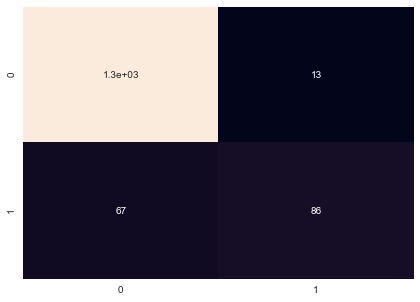

In [134]:
# Logistic Regression 
log_Xtrain = X_train.drop('CustomerSince',axis =1)
log_Xtest = X_test.drop('CustomerSince',axis =1)
log_model,log_ypred = logistic_regression(log_Xtrain,log_Xtest,y_train)

#print(log_model.get_params)

accuracy_model(log_model,log_Xtrain,log_Xtest,y_train,y_test)

get_cf_cr(y_test,log_ypred)

In [148]:
# hypertuning logistic Regression 
model = LogisticRegression(max_iter = 1000)
log_gd = hypertuning(params = log_params,model = model,X = log_Xtrain,y =y_train,n_cv = 5)
warnings.filterwarnings("ignore")

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


Accuracy on Training data  is : 0.9526678141135972
Accuracy on Test data  is : 0.9497991967871486
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.84      0.63      0.72       153

    accuracy                           0.95      1494
   macro avg       0.90      0.81      0.85      1494
weighted avg       0.95      0.95      0.95      1494



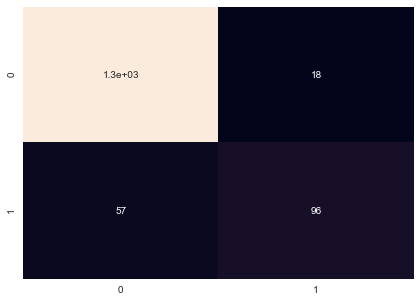

In [136]:
hyper_log_model = log_gd.best_estimator_
hyper_log_model.fit(log_Xtrain,y_train)
hyper_log_ypred = hyper_log_model.predict(log_Xtest)

accuracy_model(hyper_log_model,log_Xtrain,log_Xtest,y_train,y_test)

get_cf_cr(y_test,hyper_log_ypred)

###### Hypertuned Regression model has higher accuracy and higher recall when compared to simple model

In [137]:
# KNN
#X_train =X_train,X_test = X_test,y_train = y_train
knn_model,knn_ypred = knn(n_neighbors = 3,X_train =X_train,X_test = X_test,y_train = y_train)

k=[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))
    print('-'*60)

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.9524765729585006:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.87      0.63      0.73       153

    accuracy                           0.95      1494
   macro avg       0.92      0.81      0.85      1494
weighted avg       0.95      0.95      0.95      1494

------------------------------------------------------------
Accuracy on Training data for k 3 is 0.9784853700516352:
Accuracy on Test data for k 3 is 0.9571619812583668:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1341
           1       0.92      0.63      0.75       153

    accuracy                           0.96      1494
   macro avg       0.94      0.81      0.86      1494
weighted avg       0.96      0.96      0.95      1494

------------------------------

###### We want better recall so we will slelct k =3  
1. Accuracy on Training data for k 3 is 0.9784853700516352<br>
2. Accuracy on Test data for k 3 is 0.9571619812583668

greater than Logistic regression

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1341
           1       0.44      0.57      0.50       153

    accuracy                           0.88      1494
   macro avg       0.69      0.74      0.71      1494
weighted avg       0.90      0.88      0.89      1494



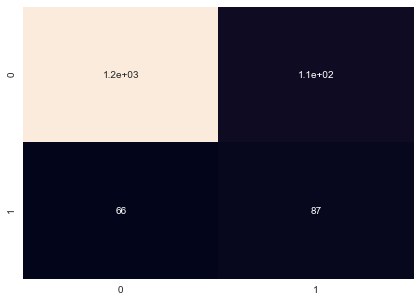

In [138]:
# Naive Bayes 
gnb_model,gnb_ypred = naive_bayes_gnb(X_train =X_train,X_test = X_test,y_train = y_train)
get_cr_cf(y_test,gnb_ypred)

###### accuracy of Naive Bayes is very poor so it is not a better model

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1341
           1       0.99      0.55      0.71       153

    accuracy                           0.95      1494
   macro avg       0.97      0.77      0.84      1494
weighted avg       0.95      0.95      0.95      1494



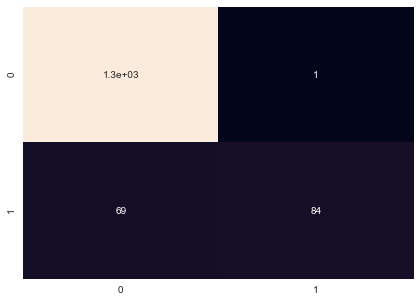

In [139]:
# SVM-SVC
svc_model,svc_ypred = svm_svc(gamma = 0.1,C = 1.0,X_train = X_train,X_test = X_test,y_train = y_train)
get_cr_cf(y_test,svc_ypred)

In [140]:
#Hypertuning SVM classifier 
svc_model = SVC()
svc_gd = hypertuning(params = svc_params,model = svc_model,X = X_train,y= y_train,n_cv = 5)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


Accuracy on Training data  is : 0.9888123924268503
Accuracy on Test data  is : 0.9812583668005355
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1341
           1       0.95      0.86      0.90       153

    accuracy                           0.98      1494
   macro avg       0.97      0.93      0.95      1494
weighted avg       0.98      0.98      0.98      1494



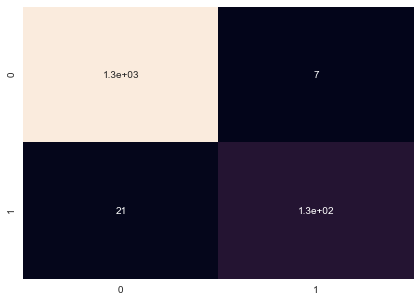

In [141]:
hyper_svc_model = svc_gd.best_estimator_
hyper_svc_model.fit(X_train,y_train)
hyper_svc_ypred = hyper_svc_model.predict(X_test)

accuracy_model(hyper_svc_model,X_train,X_test,y_train,y_test)

get_cf_cr(y_test,hyper_svc_ypred)


In [142]:
print(svc_gd.best_estimator_)
print(svc_gd.best_params_)

SVC(C=545.5594781168514, degree=2, gamma='auto')
{'C': 545.5594781168514, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}


###### So far the best model is Svm with parameters 
1.C=545.5594781168514<br>
2.degree=2<br>
3.gamma='auto'<br>
4.kernal = 'rbf<br>

With accuarcy :<br> 
Accuracy on Training data  is : 0.9888123924268503  = 98%<br>
Accuracy on Test data  is : 0.9812583668005355 = 98% <br>

#### Now performing all test again for data with handling outliers

In [153]:
def handle_outliers(handle_X):
    for c in ['Age','CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage']:
        q1 = handle_X[c].quantile(.25)
        q3 = handle_X[c].quantile(.75)
        IQR = q3-q1
        up = q3 + (IQR * 1.5)
        down = q1 - (1.5 * IQR)
    
    
        up_f = handle_X[c] >= up
        down_f = handle_X[c] <= down
    
        # replacing all the outliers with mean
        handle_X.loc[up_f,c] = handle_X[c].mean()
        handle_X.loc[up_f,c] = handle_X[c].mean()

In [159]:
handle_X = X.copy()
handle_outliers(handle_X)

handle_X.head()

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,HiddenScore,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
9,34.0,9.0,180.0,1.620381,1,3,0.0,0,0,0,0
10,65.0,39.0,105.0,2.400000,4,3,0.0,0,0,0,0
11,29.0,5.0,45.0,0.100000,3,2,0.0,0,0,1,0
12,48.0,23.0,114.0,3.800000,2,3,0.0,1,0,0,0
13,59.0,32.0,40.0,2.500000,4,2,0.0,0,0,1,0


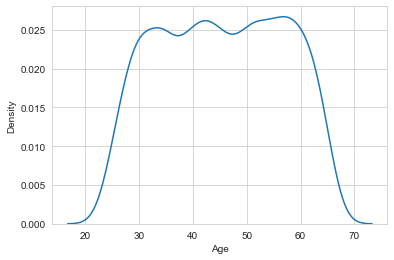

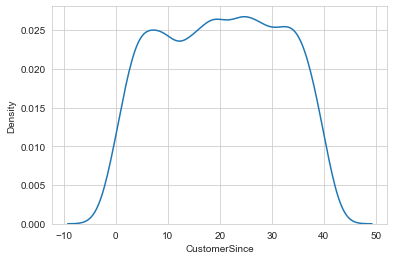

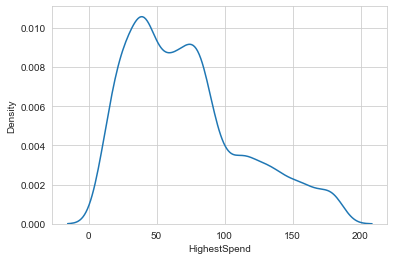

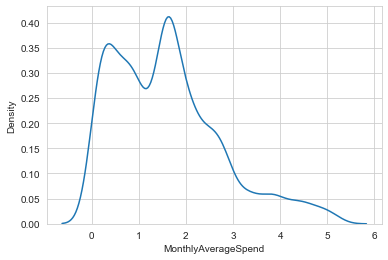

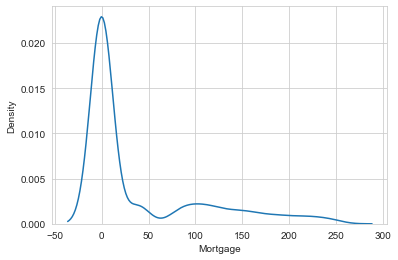

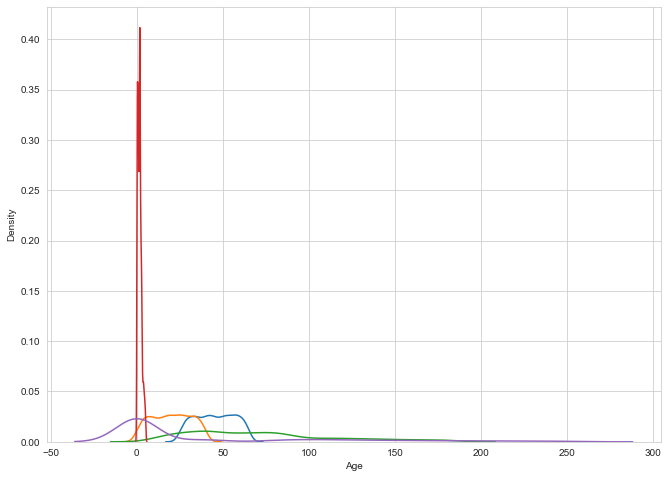

In [171]:
cols = ['Age','CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage']

for c in cols:
    plt.figure(figsize =(6,4))
    sns.kdeplot(x = c,data=handle_X)
    plt.show()
    

sns.kdeplot(x = cols[0],data=handle_X)
sns.kdeplot(x = cols[1],data=handle_X)
sns.kdeplot(x = cols[2],data=handle_X)
sns.kdeplot(x = cols[3],data=handle_X)
sns.kdeplot(x = cols[4],data=handle_X)
plt.show()

In [161]:
sc = MinMaxScaler()
handle_X_scaled = pd.DataFrame(sc.fit_transform(handle_X),columns = handle_X.columns)

X_train,X_test,y_train,y_test = train_test_split(handle_X_scaled,y,test_size = 0.3,random_state =1)

Accuracy on Training data  is : 0.9503729202524384
Accuracy on Test data  is : 0.9484605087014726
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1341
           1       0.91      0.55      0.69       153

    accuracy                           0.95      1494
   macro avg       0.93      0.77      0.83      1494
weighted avg       0.95      0.95      0.94      1494



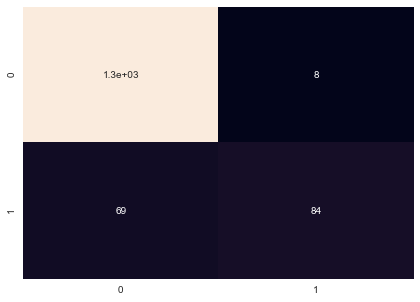

In [162]:
log_Xtrain = X_train.drop('CustomerSince',axis =1)
log_Xtest = X_test.drop('CustomerSince',axis =1)
log_model,log_ypred = logistic_regression(log_Xtrain,log_Xtest,y_train)

#print(log_model.get_params)

accuracy_model(log_model,log_Xtrain,log_Xtest,y_train,y_test)

get_cf_cr(y_test,log_ypred)

In [163]:
# hypertuning logistic Regression 
model = LogisticRegression(max_iter = 1000)
log_gd = hypertuning(params = log_params,model = model,X = log_Xtrain,y =y_train,n_cv = 5)
warnings.filterwarnings("ignore")

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


Accuracy on Training data  is : 0.9520940906483075
Accuracy on Test data  is : 0.9538152610441767
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.88      0.63      0.74       153

    accuracy                           0.95      1494
   macro avg       0.92      0.81      0.86      1494
weighted avg       0.95      0.95      0.95      1494



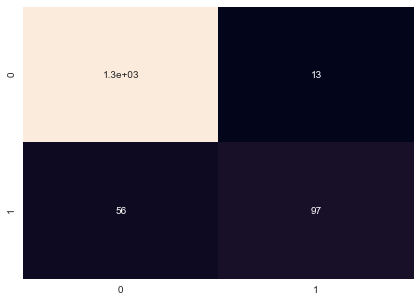

In [164]:
hyper_log_model = log_gd.best_estimator_
hyper_log_model.fit(log_Xtrain,y_train)
hyper_log_ypred = hyper_log_model.predict(log_Xtest)

accuracy_model(hyper_log_model,log_Xtrain,log_Xtest,y_train,y_test)

get_cf_cr(y_test,hyper_log_ypred)

###### Hypertuned Regression model has higher accuracy and higher recall when compared to simple model

In [165]:
# KNN
#X_train =X_train,X_test = X_test,y_train = y_train
knn_model,knn_ypred = knn(n_neighbors = 3,X_train =X_train,X_test = X_test,y_train = y_train)

k=[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))
    print('-'*60)

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.9598393574297188:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1341
           1       0.92      0.67      0.77       153

    accuracy                           0.96      1494
   macro avg       0.94      0.83      0.88      1494
weighted avg       0.96      0.96      0.96      1494

------------------------------------------------------------
Accuracy on Training data for k 3 is 0.9721744119334481:
Accuracy on Test data for k 3 is 0.9531459170013387:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.91      0.60      0.72       153

    accuracy                           0.95      1494
   macro avg       0.93      0.80      0.85      1494
weighted avg       0.95      0.95      0.95      1494

------------------------------

###### We want better recall so we will slelct k =3  
1. Accuracy on Training data for k 3 is 0.9784853700516352<br>
2. Accuracy on Test data for k 3 is 0.9571619812583668

greater than Logistic regression

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1341
           1       0.55      0.46      0.50       153

    accuracy                           0.91      1494
   macro avg       0.75      0.71      0.73      1494
weighted avg       0.90      0.91      0.90      1494



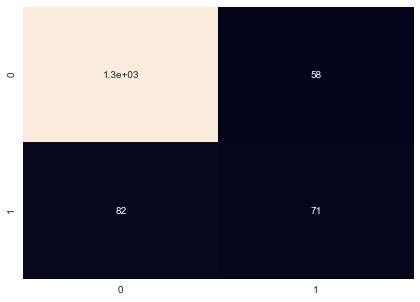

In [166]:
# Naive Bayes 
gnb_model,gnb_ypred = naive_bayes_gnb(X_train =X_train,X_test = X_test,y_train = y_train)
get_cr_cf(y_test,gnb_ypred)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1341
           1       0.97      0.50      0.66       153

    accuracy                           0.95      1494
   macro avg       0.96      0.75      0.82      1494
weighted avg       0.95      0.95      0.94      1494



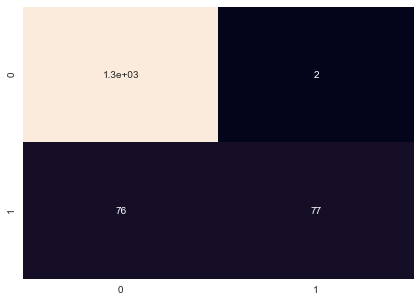

In [167]:
# SVM-SVC
svc_model,svc_ypred = svm_svc(gamma = 0.1,C = 1.0,X_train = X_train,X_test = X_test,y_train = y_train)
get_cr_cf(y_test,svc_ypred)

In [168]:
#Hypertuning SVM classifier 
svc_model = SVC()
svc_gd = hypertuning(params = svc_params,model = svc_model,X = X_train,y= y_train,n_cv = 5)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


Accuracy on Training data  is : 0.9747561675272519
Accuracy on Test data  is : 0.9705488621151271
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1341
           1       0.94      0.76      0.84       153

    accuracy                           0.97      1494
   macro avg       0.95      0.88      0.91      1494
weighted avg       0.97      0.97      0.97      1494



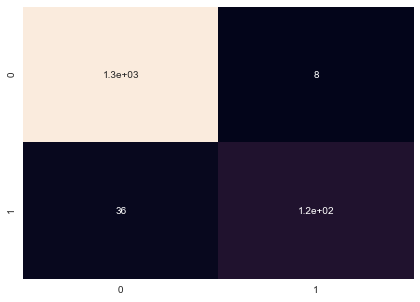

In [169]:
hyper_svc_model = svc_gd.best_estimator_
hyper_svc_model.fit(X_train,y_train)
hyper_svc_ypred = hyper_svc_model.predict(X_test)

accuracy_model(hyper_svc_model,X_train,X_test,y_train,y_test)

get_cf_cr(y_test,hyper_svc_ypred)

In [170]:
print(svc_gd.best_estimator_)
print(svc_gd.best_params_)

SVC(C=4.281332398719396, degree=2, kernel='poly')
{'C': 4.281332398719396, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


#### Check for target balancing and fix it if found imbalanced. 

In [172]:
sc = MinMaxScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X),columns = X.columns)
X_train,X_test,y_train,y_test = train_test_split(handle_X_scaled,y,test_size = 0.3,random_state =1)

In [177]:
#Smote
smote = SMOTE(k_neighbors=5)
sm_Xtrain,sm_ytrain = smote.fit_resample(X_train,y_train)

print("Before Smote \n",Counter(y_train),"\n ","-"*100)
print("Before Smote \n",Counter(sm_ytrain),"\n ","-"*100)

Before Smote 
 Counter({0: 3159, 1: 327}) 
  ----------------------------------------------------------------------------------------------------
Before Smote 
 Counter({0: 3159, 1: 3159}) 
  ----------------------------------------------------------------------------------------------------


In [178]:
#KNN 
k=[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))
    print('-'*60)

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.9598393574297188:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1341
           1       0.92      0.67      0.77       153

    accuracy                           0.96      1494
   macro avg       0.94      0.83      0.88      1494
weighted avg       0.96      0.96      0.96      1494

------------------------------------------------------------
Accuracy on Training data for k 3 is 0.9721744119334481:
Accuracy on Test data for k 3 is 0.9531459170013387:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.91      0.60      0.72       153

    accuracy                           0.95      1494
   macro avg       0.93      0.80      0.85      1494
weighted avg       0.95      0.95      0.95      1494

------------------------------

Accuracy on Training data  is : 0.9503729202524384
Accuracy on Test data  is : 0.9484605087014726
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1341
           1       0.91      0.55      0.69       153

    accuracy                           0.95      1494
   macro avg       0.93      0.77      0.83      1494
weighted avg       0.95      0.95      0.94      1494



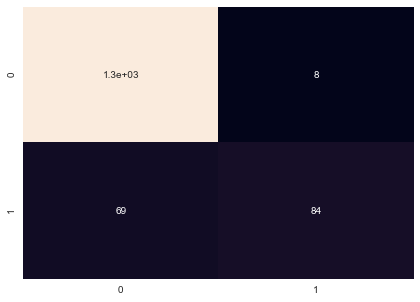

In [179]:
log_Xtrain = X_train.drop('CustomerSince',axis =1)
log_Xtest = X_test.drop('CustomerSince',axis =1)
log_model,log_ypred = logistic_regression(log_Xtrain,log_Xtest,y_train)

#print(log_model.get_params)

accuracy_model(log_model,log_Xtrain,log_Xtest,y_train,y_test)

get_cf_cr(y_test,log_ypred)

In [180]:
# hypertuning logistic Regression 
model = LogisticRegression(max_iter = 1000)
log_gd = hypertuning(params = log_params,model = model,X = log_Xtrain,y =y_train,n_cv = 5)
warnings.filterwarnings("ignore")

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


Accuracy on Training data  is : 0.9520940906483075
Accuracy on Test data  is : 0.9538152610441767
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.88      0.63      0.74       153

    accuracy                           0.95      1494
   macro avg       0.92      0.81      0.86      1494
weighted avg       0.95      0.95      0.95      1494



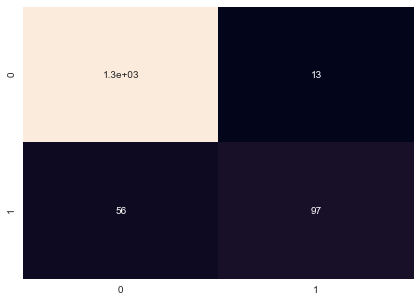

In [181]:
hyper_log_model = log_gd.best_estimator_
hyper_log_model.fit(log_Xtrain,y_train)
hyper_log_ypred = hyper_log_model.predict(log_Xtest)

accuracy_model(hyper_log_model,log_Xtrain,log_Xtest,y_train,y_test)

get_cf_cr(y_test,hyper_log_ypred)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1341
           1       0.55      0.46      0.50       153

    accuracy                           0.91      1494
   macro avg       0.75      0.71      0.73      1494
weighted avg       0.90      0.91      0.90      1494



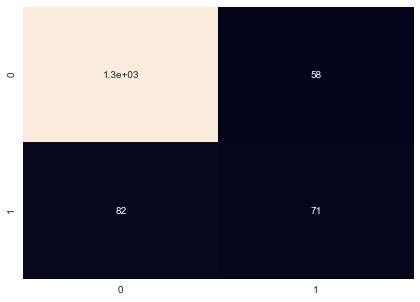

In [182]:
# Naive Bayes 
gnb_model,gnb_ypred = naive_bayes_gnb(X_train =X_train,X_test = X_test,y_train = y_train)
get_cr_cf(y_test,gnb_ypred)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1341
           1       0.97      0.50      0.66       153

    accuracy                           0.95      1494
   macro avg       0.96      0.75      0.82      1494
weighted avg       0.95      0.95      0.94      1494



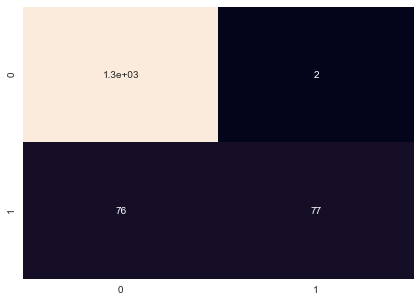

In [183]:
# SVM-SVC
svc_model,svc_ypred = svm_svc(gamma = 0.1,C = 1.0,X_train = X_train,X_test = X_test,y_train = y_train)
get_cr_cf(y_test,svc_ypred)

In [184]:
#Hypertuning SVM classifier 
svc_model = SVC()
svc_gd = hypertuning(params = svc_params,model = svc_model,X = X_train,y= y_train,n_cv = 5)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


Accuracy on Training data  is : 0.9747561675272519
Accuracy on Test data  is : 0.9705488621151271
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1341
           1       0.94      0.76      0.84       153

    accuracy                           0.97      1494
   macro avg       0.95      0.88      0.91      1494
weighted avg       0.97      0.97      0.97      1494



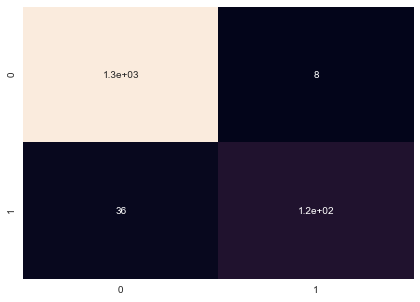

In [185]:
hyper_svc_model = svc_gd.best_estimator_
hyper_svc_model.fit(X_train,y_train)
hyper_svc_ypred = hyper_svc_model.predict(X_test)

accuracy_model(hyper_svc_model,X_train,X_test,y_train,y_test)

get_cf_cr(y_test,hyper_svc_ypred)

In [186]:
print(svc_gd.best_estimator_)
print(svc_gd.best_params_)

SVC(C=4.281332398719396, degree=2, kernel='poly')
{'C': 4.281332398719396, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


#### With Top Feaatures 

In [187]:
bf = SelectKBest(score_func = chi2,k =5)
fit = bf.fit(X_train,y_train)

score_df= pd.DataFrame(fit.scores_)
cols_df = pd.DataFrame(X_train.columns)
features_df = pd.concat([cols_df,score_df],axis = 1)
features_df.columns = ['Features','Score']
features_df.sort_values(by ='Score',ascending = False, ignore_index = True,inplace = True)
features_df

,Features,Score
0,FixedDepositAccount,304.801649
1,HighestSpend,129.541358
2,MonthlyAverageSpend,42.501183
3,Level,27.573115
4,HiddenScore,2.686939
5,Mortgage,0.806396
6,Security,0.585863
7,CreditCard,0.296288
8,Age,0.216523
9,CustomerSince,0.181774


Top features according to statistics :
1. FixedDepositAccount<br>
2. HighestSpend	<br>
3. MonthlyAverageSpend <br>	
4. Level <br>
5. HiddenScore <br>


In [188]:
x_cols = ['FixedDepositAccount','HighestSpend','MonthlyAverageSpend','HiddenScore','Level']

imp_X = data_fill[x_cols]
imp_y = data_fill['LoanOnCard']

sc = MinMaxScaler()
handle_X_scaled = pd.DataFrame(sc.fit_transform(handle_X),columns = handle_X.columns)

X_train,X_test,y_train,y_test = train_test_split(handle_X_scaled,y,test_size = 0.3,random_state =1)

Accuracy on Training data  is : 0.9503729202524384
Accuracy on Test data  is : 0.9491298527443106
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1341
           1       0.91      0.56      0.69       153

    accuracy                           0.95      1494
   macro avg       0.93      0.77      0.83      1494
weighted avg       0.95      0.95      0.94      1494



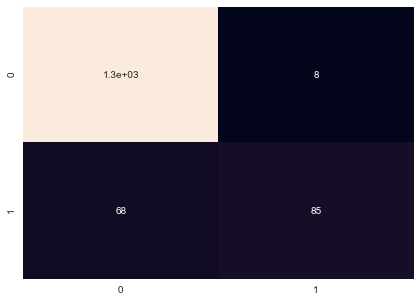

In [196]:
log_model,log_ypred = logistic_regression(X_train,X_test,y_train)

#print(log_model.get_params)

accuracy_model(log_model,X_train,X_test,y_train,y_test)

get_cf_cr(y_test,log_ypred)

In [194]:
#KNN 
k=[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))
    print('-'*60)

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.9598393574297188:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1341
           1       0.92      0.67      0.77       153

    accuracy                           0.96      1494
   macro avg       0.94      0.83      0.88      1494
weighted avg       0.96      0.96      0.96      1494

------------------------------------------------------------
Accuracy on Training data for k 3 is 0.9721744119334481:
Accuracy on Test data for k 3 is 0.9531459170013387:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.91      0.60      0.72       153

    accuracy                           0.95      1494
   macro avg       0.93      0.80      0.85      1494
weighted avg       0.95      0.95      0.95      1494

------------------------------

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1341
           1       0.97      0.50      0.66       153

    accuracy                           0.95      1494
   macro avg       0.96      0.75      0.82      1494
weighted avg       0.95      0.95      0.94      1494



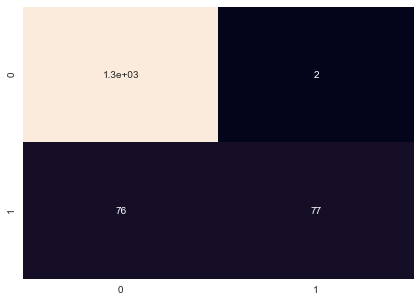

In [189]:
# SVM-SVC
svc_model,svc_ypred = svm_svc(gamma = 0.1,C = 1.0,X_train = X_train,X_test = X_test,y_train = y_train)
get_cr_cf(y_test,svc_ypred)

In [190]:
#Hypertuning SVM classifier 
svc_model = SVC()
svc_gd = hypertuning(params = svc_params,model = svc_model,X = X_train,y= y_train,n_cv = 5)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


Accuracy on Training data  is : 0.9747561675272519
Accuracy on Test data  is : 0.9705488621151271
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1341
           1       0.94      0.76      0.84       153

    accuracy                           0.97      1494
   macro avg       0.95      0.88      0.91      1494
weighted avg       0.97      0.97      0.97      1494



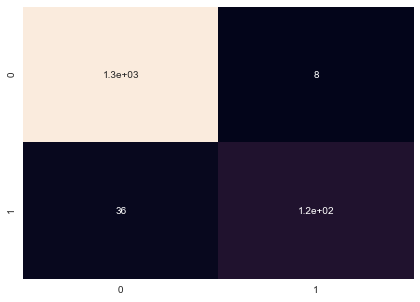

In [191]:
hyper_svc_model = svc_gd.best_estimator_
hyper_svc_model.fit(X_train,y_train)
hyper_svc_ypred = hyper_svc_model.predict(X_test)

accuracy_model(hyper_svc_model,X_train,X_test,y_train,y_test)

get_cf_cr(y_test,hyper_svc_ypred)

In [193]:
print(svc_gd.best_params_)

{'C': 4.281332398719396, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


# CONCLUSION



1. SVM Svc is better model that gives better accuracy
2. logistic Regression and Knn Models are performing same with imbalance and with or without outliers handled
3. Gaussian NB is perming well if there is no imbalane in the dataset
4. Performed various algorithms with important features accuracy has same as the models which are used for balanced data

###### So far the best model is Svm with parameters 
1. C=545.5594781168514<br>
2. degree=2<br>
3. gamma='auto'<br>
4. kernal = 'rbf<br>

With accuarcy :<br> 
   Accuracy on Training data  is : 0.9888123924268503  = 98%<br>
   Accuracy on Test data  is : 0.9812583668005355 = 98% <br>